In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mh-risk-dataset/mhr-data.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Project Title : Maternal Health Risk assessment during pregnancy using Machine Learning Techniques.**

# Loading the Data and Preprocessing

In [3]:
# imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
#Read the dataset and store it in a dataframe
df = pd.read_csv('/kaggle/input/mh-risk-dataset/mhr-data.csv')

In [5]:
# #tells the number of rows and columns of a given DataFrame
print("Shape of the dataset", df.shape)
df.shape

#printing number of rows and number of columns
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Shape of the dataset (1205, 12)
Number of rows:  1205
Number of columns:  12


In [6]:
df.head() #Shows us the first 5 rows of the dataset

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low


In [7]:
df.size # number of total elements in the dataset; 1205 \times 12

14460

In [9]:
#printing the column names in the form of a list
col_list = [] # this is an empty list
for x in df.columns:
    col_list.append(x)

col_list

['Age',
 'Systolic BP',
 'Diastolic',
 'BS',
 'Body Temp',
 'BMI',
 'Previous Complications',
 'Preexisting Diabetes',
 'Gestational Diabetes',
 'Mental Health',
 'Heart Rate',
 'Risk Level']

In [10]:
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
# printing Basic infos (Non-null count and data type) per feature of the dataset
print(df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1205 non-null   int64  
 1   systolic_bp             1200 non-null   float64
 2   diastolic               1201 non-null   float64
 3   bs                      1203 non-null   float64
 4   body_temp               1205 non-null   int64  
 5   bmi                     1187 non-null   float64
 6   previous_complications  1203 non-null   float64
 7   preexisting_diabetes    1203 non-null   float64
 8   gestational_diabetes    1205 non-null   int64  
 9   mental_health           1205 non-null   int64  
 10  heart_rate              1203 non-null   float64
 11  risk_level              1187 non-null   object 
dtypes: float64(7), int64(4), object(1)
memory usage: 113.1+ KB
None


In [12]:
#printing basic statistical infos per feature of the dataset
df.describe()

,age,systolic_bp,diastolic,bs,body_temp,bmi,previous_complications,preexisting_diabetes,gestational_diabetes,mental_health,heart_rate
count,1205.000000,1200.000000,1201.000000,1203.000000,1205.000000,1187.000000,1203.000000,1203.000000,1205.000000,1205.00000,1203.000000
mean,27.731950,116.819167,77.166528,7.501064,98.395851,23.315080,0.175395,0.288446,0.117842,0.33444,75.817124
std,12.571074,18.715502,14.305148,3.049522,1.088363,3.875682,0.380463,0.453228,0.322555,0.47199,7.227338
min,10.000000,70.000000,40.000000,3.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.00000,58.000000
25%,21.000000,100.000000,65.000000,6.000000,98.000000,20.450000,0.000000,0.000000,0.000000,0.00000,70.000000
50%,25.000000,120.000000,80.000000,6.900000,98.000000,23.000000,0.000000,0.000000,0.000000,0.00000,76.000000
75%,32.000000,130.000000,90.000000,7.900000,98.000000,25.000000,0.000000,1.000000,0.000000,1.00000,80.000000
max,325.000000,200.000000,140.000000,19.000000,103.000000,37.000000,1.000000,1.000000,1.000000,1.00000,92.000000


In [13]:
for col in df:
    print(f'{col}: {df[col].unique()}')

age: [ 22  27  20  23  26  25  19  18  24  21  44  17  28  40  37  29  34  35
  36  32  38  48  30  39  31  33  41 325  42  15  50  63  55  49  16  12
  60  65  43  13  54  10  45]
systolic_bp: [ 90. 110. 100. 120. 140. 130. 150. 160. 180. 170. 200. 115.  80. 105.
 125. 135.  nan  85.  95.  76. 129.  99.  70.  78.  75.]
diastolic: [ 60.  70.  80. 100.  90. 110.  96.  65.  85. 120. 140. 130.  95.  79.
  75.  nan  49.  63.  50.  45.  55.  40.]
bs: [ 9.    7.1   7.5   7.2   7.01  7.    6.4  12.    9.9   6.    6.5   6.6
 14.    8.    6.2   7.3   6.9   7.9   6.7  11.    6.1  18.   13.   15.
 17.   19.    7.7   7.6   7.8   5.3   5.7   7.4   5.2   5.5   6.3  10.
 16.    8.6   8.4   8.3   8.1   8.2   8.7   8.9   8.8   9.8   9.7   5.6
  4.5   5.8   4.9   6.8   3.9   4.7   3.6   4.1   4.4   4.6   5.01  6.02
  5.9   4.    4.3   4.8   4.2   5.    3.4   4.03  6.04  3.7   3.5   3.
  3.8   3.3   3.01  4.01  5.07  6.09  4.07  8.01   nan  5.1   9.3  11.1
 11.5 ]
body_temp: [100  98 102 101  97  99 103]

In [14]:
#prints maximum values of Age features
for col in df.iloc[:, :-1]:  # Exclude the Y label column
    print(f'{col}: {df[col].max()}')

age: 325
systolic_bp: 200.0
diastolic: 140.0
bs: 19.0
body_temp: 103
bmi: 37.0
previous_complications: 1.0
preexisting_diabetes: 1.0
gestational_diabetes: 1
mental_health: 1
heart_rate: 92.0


In [15]:
df.isnull().sum() # check how many missing values in the data

age                        0
systolic_bp                5
diastolic                  4
bs                         2
body_temp                  0
bmi                       18
previous_complications     2
preexisting_diabetes       2
gestational_diabetes       0
mental_health              0
heart_rate                 2
risk_level                18
dtype: int64

In [16]:
df.describe()

,age,systolic_bp,diastolic,bs,body_temp,bmi,previous_complications,preexisting_diabetes,gestational_diabetes,mental_health,heart_rate
count,1205.000000,1200.000000,1201.000000,1203.000000,1205.000000,1187.000000,1203.000000,1203.000000,1205.000000,1205.00000,1203.000000
mean,27.731950,116.819167,77.166528,7.501064,98.395851,23.315080,0.175395,0.288446,0.117842,0.33444,75.817124
std,12.571074,18.715502,14.305148,3.049522,1.088363,3.875682,0.380463,0.453228,0.322555,0.47199,7.227338
min,10.000000,70.000000,40.000000,3.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.00000,58.000000
25%,21.000000,100.000000,65.000000,6.000000,98.000000,20.450000,0.000000,0.000000,0.000000,0.00000,70.000000
50%,25.000000,120.000000,80.000000,6.900000,98.000000,23.000000,0.000000,0.000000,0.000000,0.00000,76.000000
75%,32.000000,130.000000,90.000000,7.900000,98.000000,25.000000,0.000000,1.000000,0.000000,1.00000,80.000000
max,325.000000,200.000000,140.000000,19.000000,103.000000,37.000000,1.000000,1.000000,1.000000,1.00000,92.000000


In [17]:
df.drop_duplicates(inplace = True) #Remove Duplicate values

In [18]:
df.describe()

,age,systolic_bp,diastolic,bs,body_temp,bmi,previous_complications,preexisting_diabetes,gestational_diabetes,mental_health,heart_rate
count,1187.000000,1182.000000,1183.000000,1185.000000,1187.000000,1169.000000,1185.000000,1185.000000,1187.000000,1187.000000,1185.000000
mean,27.796125,116.804569,77.192730,7.507831,98.401853,23.334559,0.177215,0.291983,0.119629,0.339511,75.856540
std,12.616094,18.814254,14.384438,3.069674,1.095490,3.894783,0.382012,0.454867,0.324664,0.473743,7.251142
min,10.000000,70.000000,40.000000,3.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000
25%,21.000000,100.000000,65.000000,6.000000,98.000000,20.500000,0.000000,0.000000,0.000000,0.000000,70.000000
50%,25.000000,120.000000,80.000000,6.900000,98.000000,23.000000,0.000000,0.000000,0.000000,0.000000,76.000000
75%,32.000000,130.000000,90.000000,8.000000,98.000000,25.100000,0.000000,1.000000,0.000000,1.000000,80.000000
max,325.000000,200.000000,140.000000,19.000000,103.000000,37.000000,1.000000,1.000000,1.000000,1.000000,92.000000


In [19]:
#Since Y label has null values we directly remove them instead of imputation
df = df.dropna(subset=['risk_level'])

In [20]:
df.isnull().sum()

age                        0
systolic_bp                4
diastolic                  2
bs                         1
body_temp                  0
bmi                       14
previous_complications     1
preexisting_diabetes       1
gestational_diabetes       0
mental_health              0
heart_rate                 1
risk_level                 0
dtype: int64

In [21]:
#Replace the missing values for numerical columns with mean: Mean imputation
num_cols = ['systolic_bp', 'diastolic', 'bs','bmi','previous_complications','preexisting_diabetes','heart_rate']
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [22]:
df.isnull().sum()

age                       0
systolic_bp               0
diastolic                 0
bs                        0
body_temp                 0
bmi                       0
previous_complications    0
preexisting_diabetes      0
gestational_diabetes      0
mental_health             0
heart_rate                0
risk_level                0
dtype: int64

# Label Encoding the Categorical Value

In [23]:
#Converting the Y label categorical value to Numerical Value using label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['risk_level'] = le.fit_transform(df['risk_level']) #Label Encoding risk level feature because it is categorical value

# Inverse transform to label high_risk as 1 and low_risk as 0
df['risk_level'] = df['risk_level'].apply(lambda x: 1 if x == 0 else 0)

In [24]:
df.shape

(1169, 12)

# Visualization

In [25]:
print(df.columns.tolist()) # convert a given array to an ordinary list

['age', 'systolic_bp', 'diastolic', 'bs', 'body_temp', 'bmi', 'previous_complications', 'preexisting_diabetes', 'gestational_diabetes', 'mental_health', 'heart_rate', 'risk_level']


In [26]:
#make a copy of the dataset after dropping the columns having only two classes
df_cp = df.drop(columns=['previous_complications','preexisting_diabetes','gestational_diabetes','mental_health','risk_level'])

In [27]:
df.head(10)

,age,systolic_bp,diastolic,bs,body_temp,bmi,previous_complications,preexisting_diabetes,gestational_diabetes,mental_health,heart_rate,risk_level
0,22,90.0,60.0,9.00,100,18.0,1.0,1.0,0,1,80.0,1
1,22,110.0,70.0,7.10,98,20.4,0.0,0.0,0,0,74.0,0
2,27,110.0,70.0,7.50,98,23.0,1.0,0.0,0,0,72.0,0
3,20,100.0,70.0,7.20,98,21.2,0.0,0.0,0,0,74.0,0
4,20,90.0,60.0,7.50,98,19.7,0.0,0.0,0,0,74.0,0
5,22,120.0,70.0,7.01,98,24.0,0.0,0.0,0,0,76.0,0
6,20,110.0,70.0,9.00,102,17.6,0.0,1.0,0,0,78.0,1
7,23,110.0,80.0,7.00,98,21.3,0.0,0.0,0,0,74.0,0
8,22,90.0,60.0,6.40,98,22.0,0.0,0.0,0,0,72.0,0
9,26,110.0,70.0,12.00,100,30.2,1.0,1.0,1,1,80.0,1


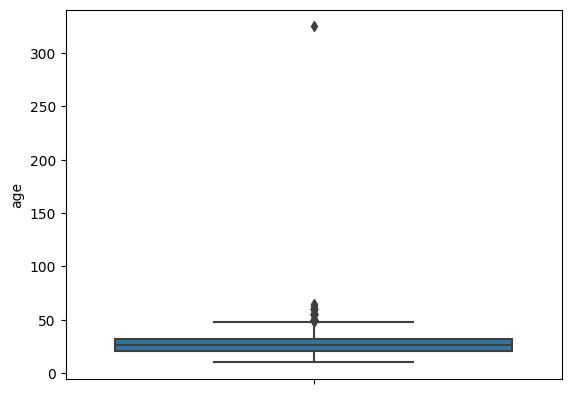

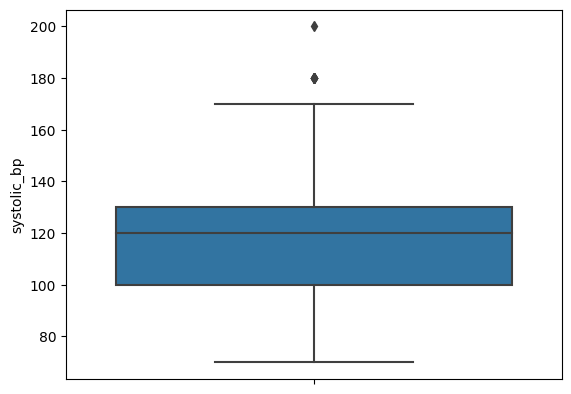

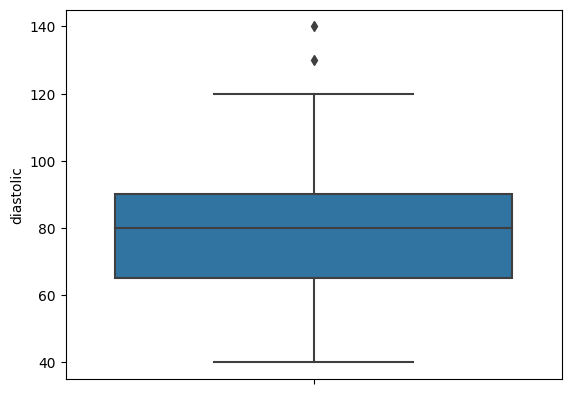

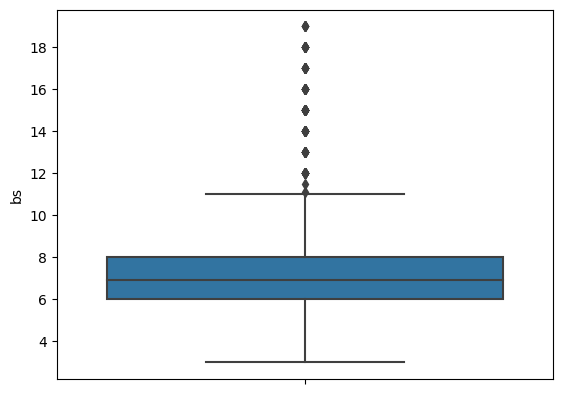

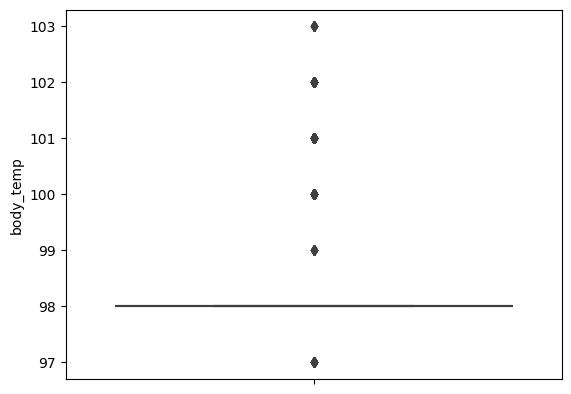

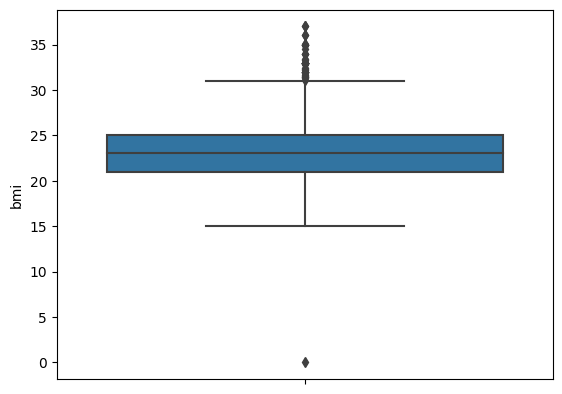

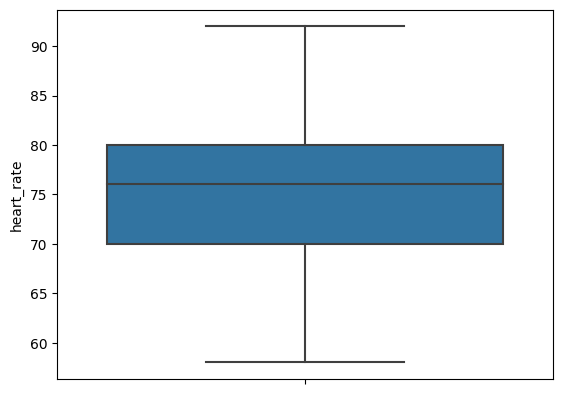

In [28]:
#Vertical Boxplot of all columns
for i in df_cp.columns:
    plt.figure()
    sns.boxplot(y=i, data = df_cp)

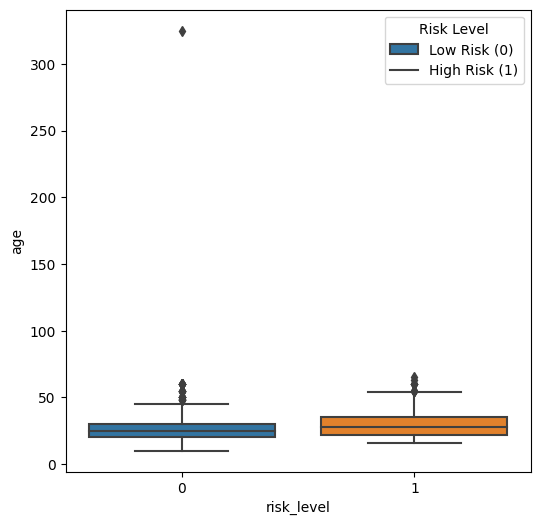

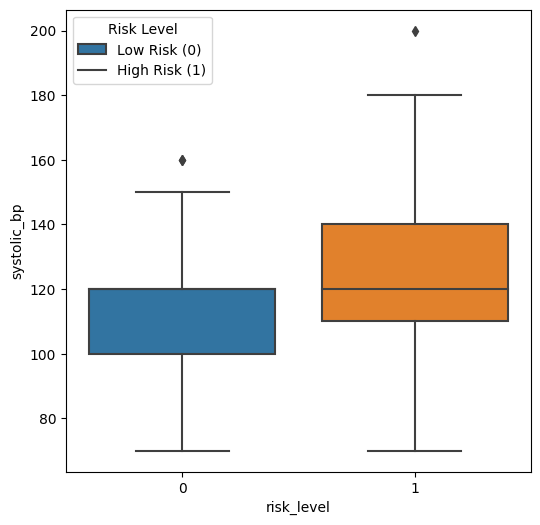

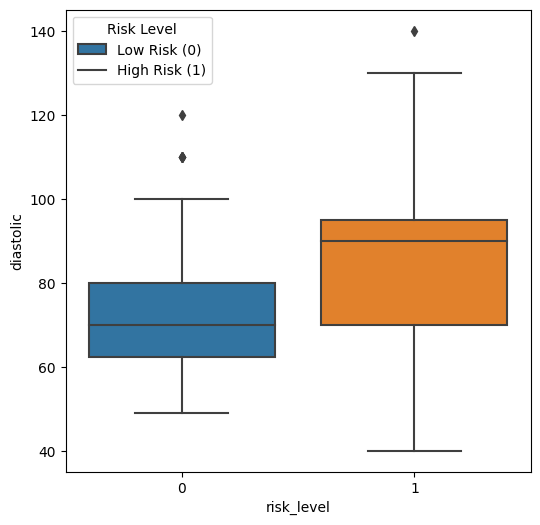

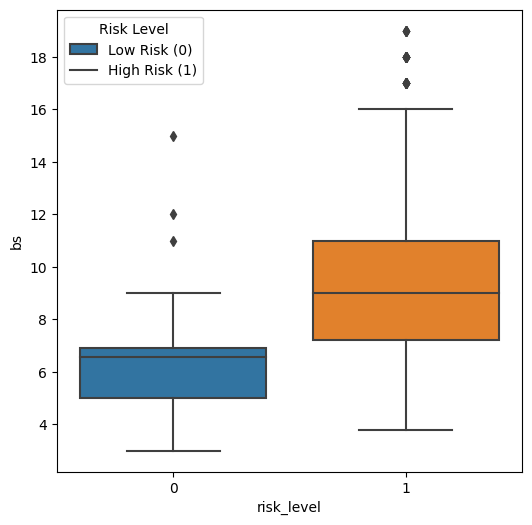

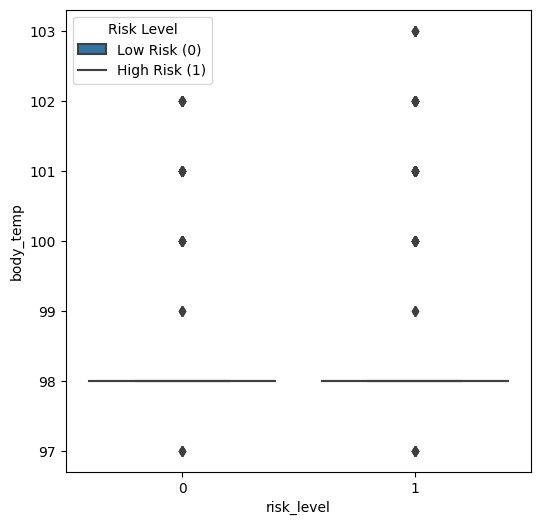

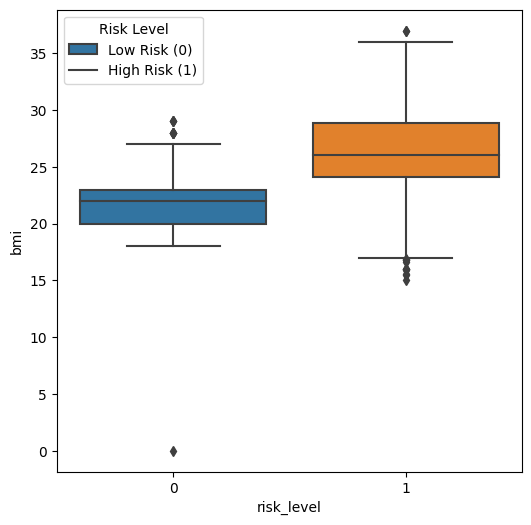

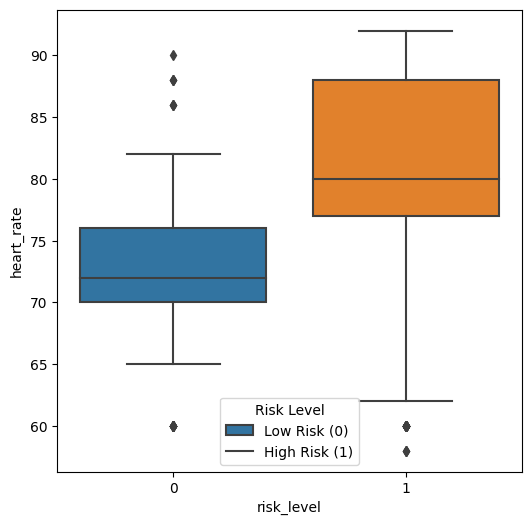

In [29]:
exclude_cols = ['previous_complications','preexisting_diabetes','gestational_diabetes','mental_health','risk_level']
for i in df.columns:
    if i not in exclude_cols:
        plt.figure(figsize=(6,6))
        sns.boxplot(y=i, x = 'risk_level', data = df)
        plt.legend(['Low Risk (0)', 'High Risk (1)'], title="Risk Level")

In [30]:
# Sample: identify non-binary numeric columns
non_binary_cols = [
    col for col in df.select_dtypes(include=['number']).columns
    if df[col].nunique() > 2
]

# Loop through each non-binary column and calculate IQR stats
for col in non_binary_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    print(f"\nFeature: {col}")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound: {lb}")
    print(f"  Upper Bound: {ub}")


Feature: age
  Q1: 21.0
  Q3: 32.0
  IQR: 11.0
  Lower Bound: 4.5
  Upper Bound: 48.5

Feature: systolic_bp
  Q1: 100.0
  Q3: 130.0
  IQR: 30.0
  Lower Bound: 55.0
  Upper Bound: 175.0

Feature: diastolic
  Q1: 65.0
  Q3: 90.0
  IQR: 25.0
  Lower Bound: 27.5
  Upper Bound: 127.5

Feature: bs
  Q1: 6.0
  Q3: 8.0
  IQR: 2.0
  Lower Bound: 3.0
  Upper Bound: 11.0

Feature: body_temp
  Q1: 98.0
  Q3: 98.0
  IQR: 0.0
  Lower Bound: 98.0
  Upper Bound: 98.0

Feature: bmi
  Q1: 21.0
  Q3: 25.0
  IQR: 4.0
  Lower Bound: 15.0
  Upper Bound: 31.0

Feature: previous_complications
  Q1: 0.0
  Q3: 0.0
  IQR: 0.0
  Lower Bound: 0.0
  Upper Bound: 0.0

Feature: preexisting_diabetes
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0
  Lower Bound: -1.5
  Upper Bound: 2.5

Feature: heart_rate
  Q1: 70.0
  Q3: 80.0
  IQR: 10.0
  Lower Bound: 55.0
  Upper Bound: 95.0


In [31]:
# Calculate the IQR
Q1 = df['age'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['age'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                  # Interquartile range

# Define lower and upper bounds for outliers
lb_age = Q1 - 1.5 * IQR
ub_age = Q3 + 1.5 * IQR

print(lb_age)
print(ub_age)

4.5
48.5


In [32]:
# Calculate the IQR
Q1 = df['bmi'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['bmi'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                  # Interquartile range

# Define lower and upper bounds for outliers
lb_bmi = Q1 - 1.5 * IQR
ub_bmi = Q3 + 1.5 * IQR

print(lb_bmi)
print(ub_bmi)

15.0
31.0


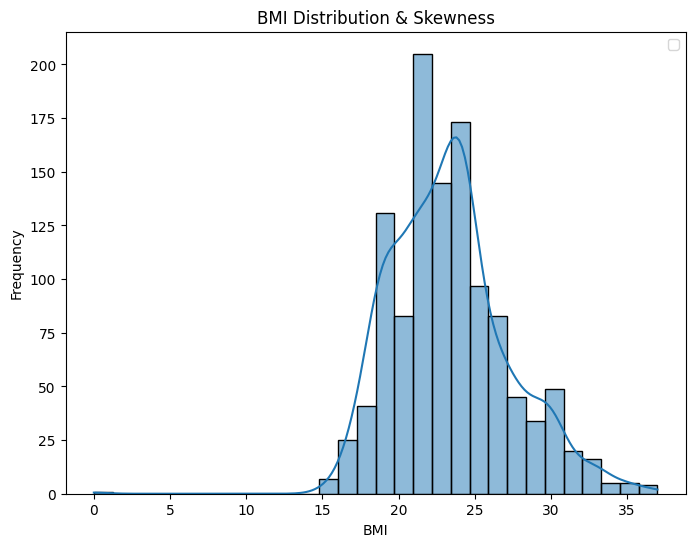

In [33]:
# Plot histogram with KDE
plt.figure(figsize=(8,6))
sns.histplot(df['bmi'], bins=30, kde=True)  # kde=True adds the density curve
plt.legend()
plt.title("BMI Distribution & Skewness")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

In [34]:
df = df[df['bmi'] != 0]

# Remove the Outliers in BMI and Age column

In [35]:
# Filter the dataset to remove outliers in BMI column
df_cln = df[(df['bmi'] >= lb_bmi) & (df['bmi'] <= ub_bmi)]

# Updated dataset size
print(df_cln.shape)

(1126, 12)


In [36]:
df_cln.head()

,age,systolic_bp,diastolic,bs,body_temp,bmi,previous_complications,preexisting_diabetes,gestational_diabetes,mental_health,heart_rate,risk_level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,1
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,0
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,0
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,0
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,0


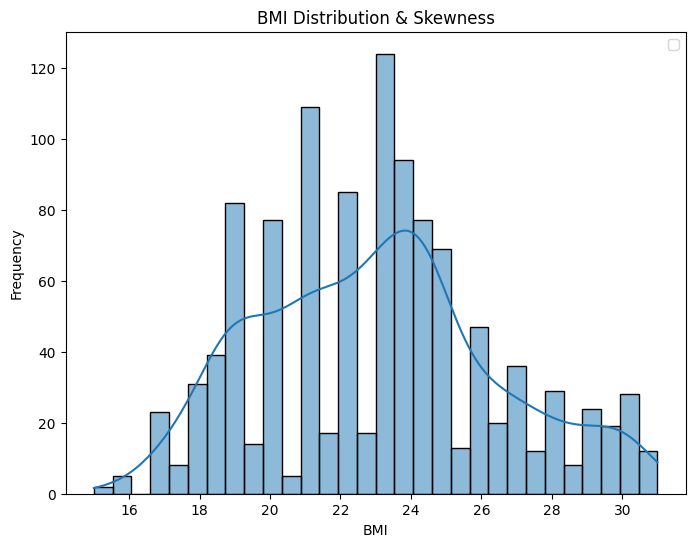

count    1126.000000
mean       27.658970
std        12.791839
min        10.000000
25%        21.000000
50%        25.000000
75%        31.000000
max       325.000000
Name: age, dtype: float64


In [37]:
# Plot histogram with KDE
plt.figure(figsize=(8,6))
sns.histplot(df_cln['bmi'], bins=30, kde=True)  # kde=True adds the density curve
plt.legend()
plt.title("BMI Distribution & Skewness")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()
print(df_cln['age'].describe())

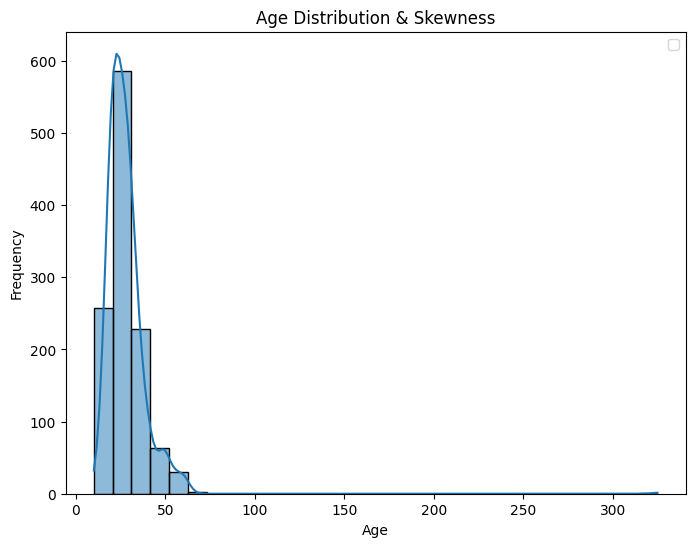

In [38]:
# Plot histogram with KDE
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=30, kde=True)  # kde=True adds the density curve
plt.legend()
plt.title("Age Distribution & Skewness")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

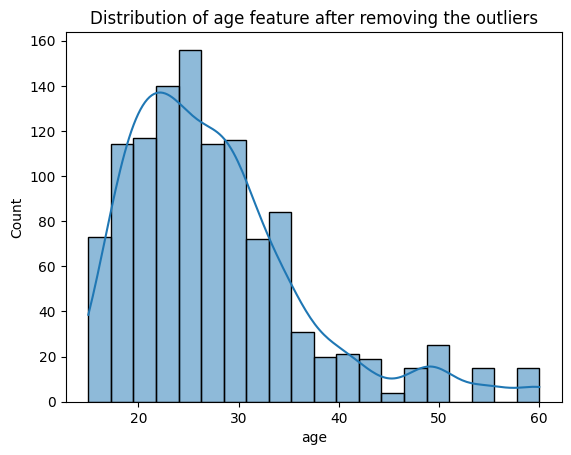

count    1151.000000
mean       27.702867
std         9.027802
min        15.000000
25%        21.000000
50%        26.000000
75%        32.000000
max        60.000000
Name: age, dtype: float64


In [39]:
# Filter according to realistic age range for pregnancy in rural Bangladesh
df_cln = df[df['age'].between(15, 60)]

sns.histplot(df_cln['age'], bins=20, kde=True)
plt.title("Distribution of age feature after removing the outliers")
plt.show()

# Check updated plot
print(df_cln['age'].describe())

In [40]:
df_cln.describe()

,age,systolic_bp,diastolic,bs,body_temp,bmi,previous_complications,preexisting_diabetes,gestational_diabetes,mental_health,heart_rate,risk_level
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,27.702867,117.033281,77.370522,7.526849,98.388358,23.390824,0.181737,0.294782,0.121633,0.344049,75.927788,0.409209
std,9.027802,18.736151,14.296552,3.073142,1.080018,3.834108,0.385629,0.455945,0.327004,0.475264,7.212610,0.491902
min,15.000000,70.000000,40.000000,3.000000,97.000000,15.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000
25%,21.000000,100.000000,65.000000,6.000000,98.000000,21.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,6.900000,98.000000,23.000000,0.000000,0.000000,0.000000,0.000000,76.000000,0.000000
75%,32.000000,130.000000,90.000000,8.000000,98.000000,25.150000,0.000000,1.000000,0.000000,1.000000,80.000000,1.000000
max,60.000000,200.000000,140.000000,19.000000,103.000000,37.000000,1.000000,1.000000,1.000000,1.000000,92.000000,1.000000


# **Scatter Plot**

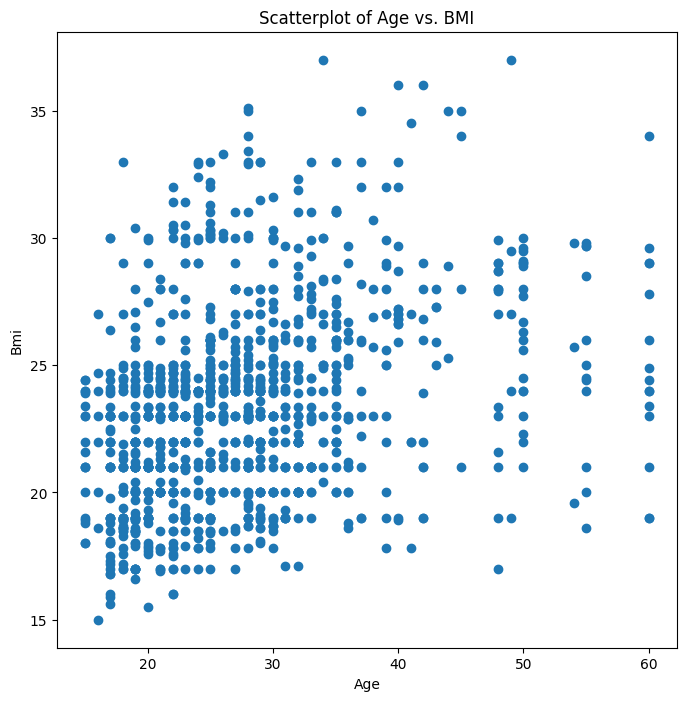

In [41]:
#Let's see how the BMI varies according to age in pregnancy
plt.figure(figsize = (8,8))
plt.scatter(x = 'age', y = 'bmi', data = df_cln)
# scatter plot with pyplot
plt.xlabel('Age')
plt.ylabel('Bmi')
plt.title('Scatterplot of Age vs. BMI');

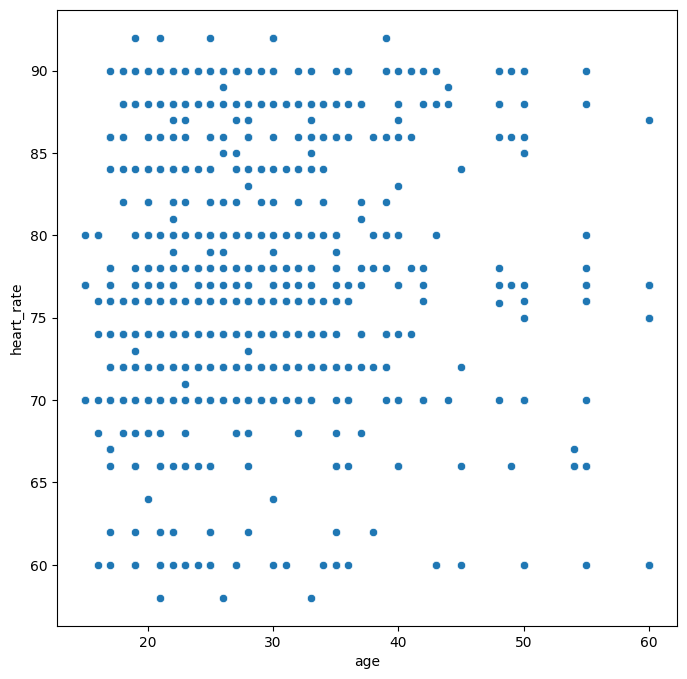

In [42]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'age', y = 'heart_rate', data = df_cln);
# scatter plot with Seaborn

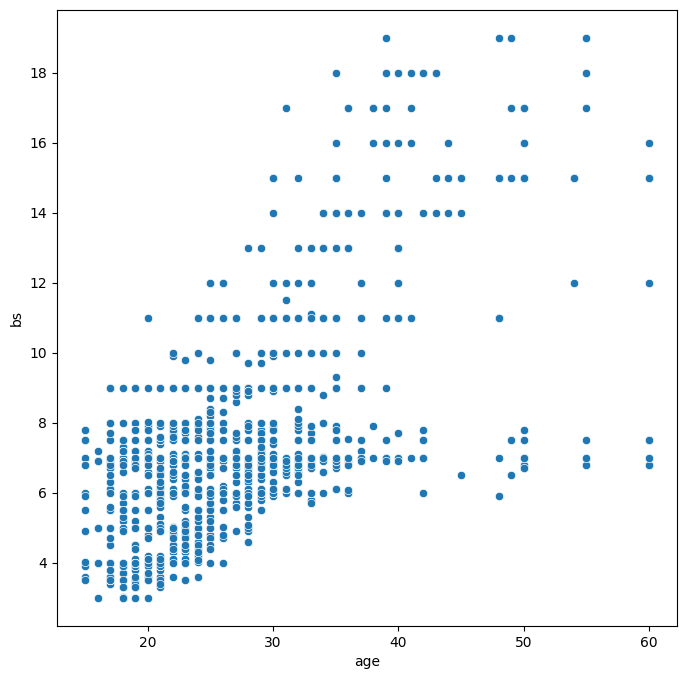

In [43]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'age', y = 'bs', data = df_cln);
# scatter plot with Seaborn

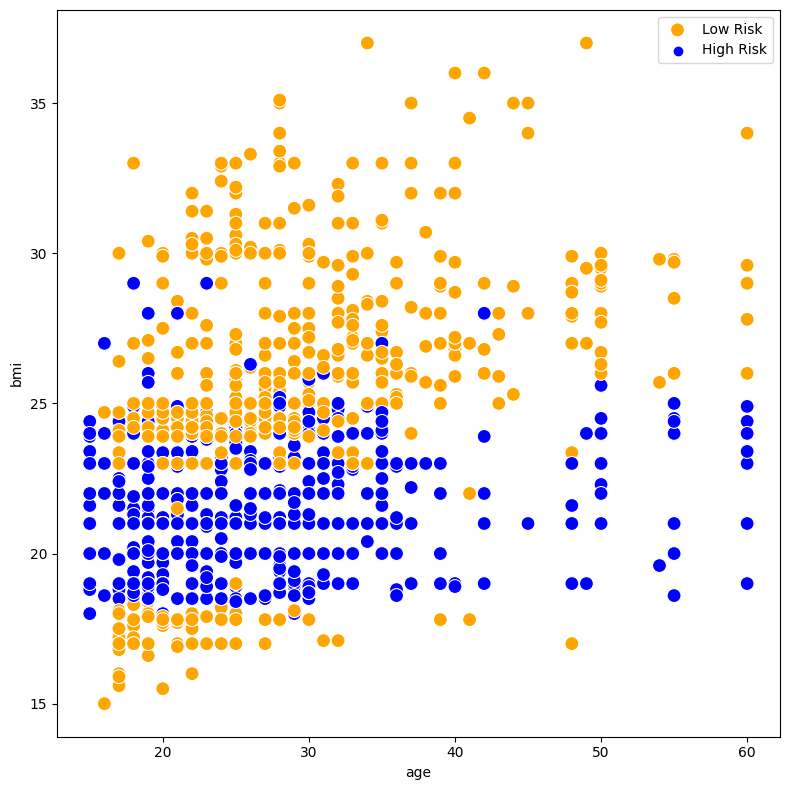

In [44]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'age', y = 'bmi', hue='risk_level', palette=['blue', 'orange'], s=100, data = df_cln);
plt.legend(labels=['Low Risk', 'High Risk'], loc='upper right')
plt.tight_layout() 
# scatter plot with Seaborn

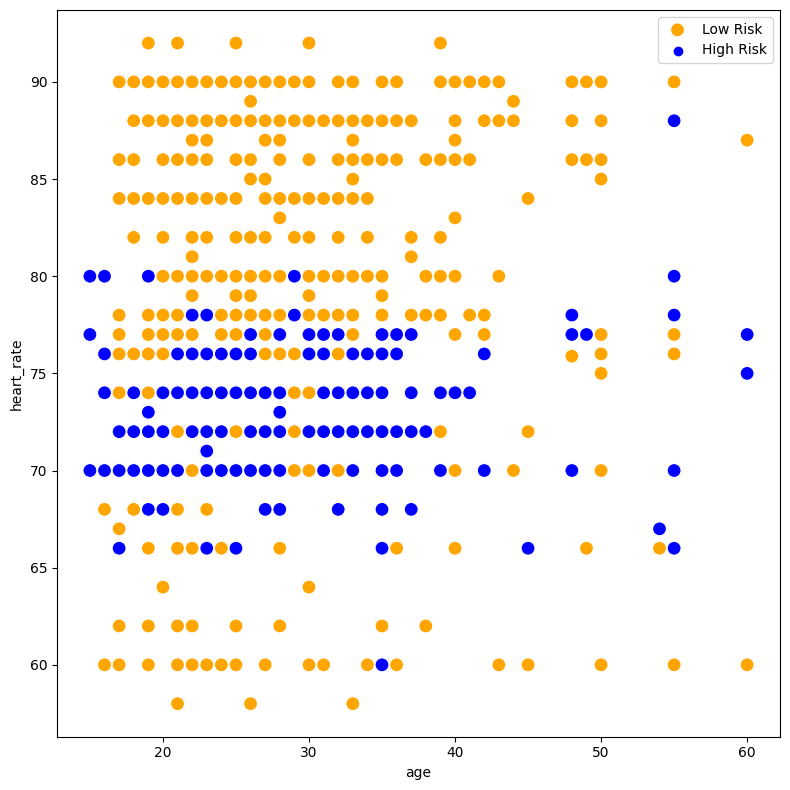

In [45]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'age', y = 'heart_rate', hue='risk_level', palette=['blue', 'orange'], s=100, data = df_cln);
plt.legend(labels=['Low Risk', 'High Risk'], loc='upper right')
plt.tight_layout() 
# scatter plot with Seaborn

# **KDE Plot**

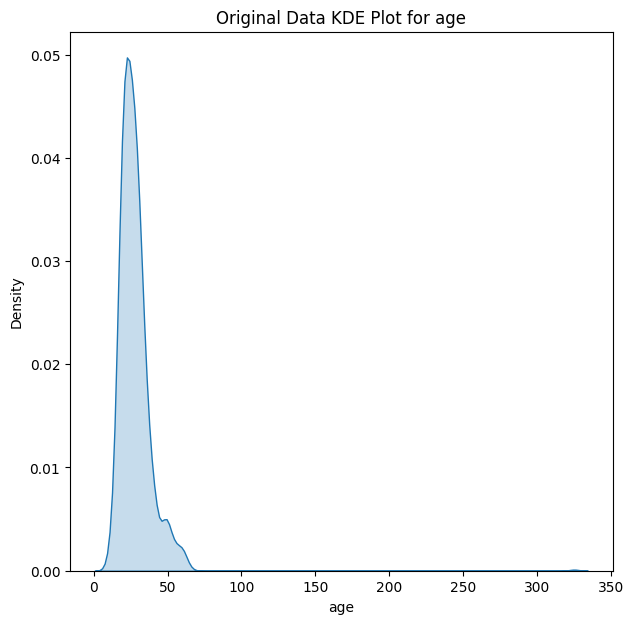

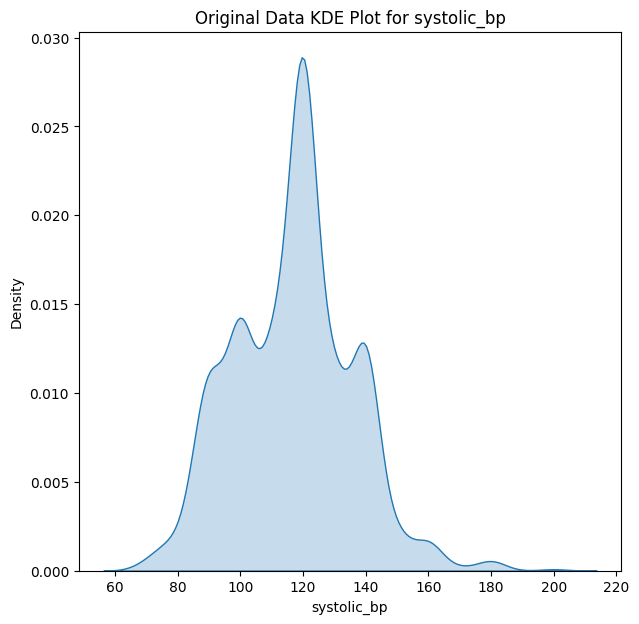

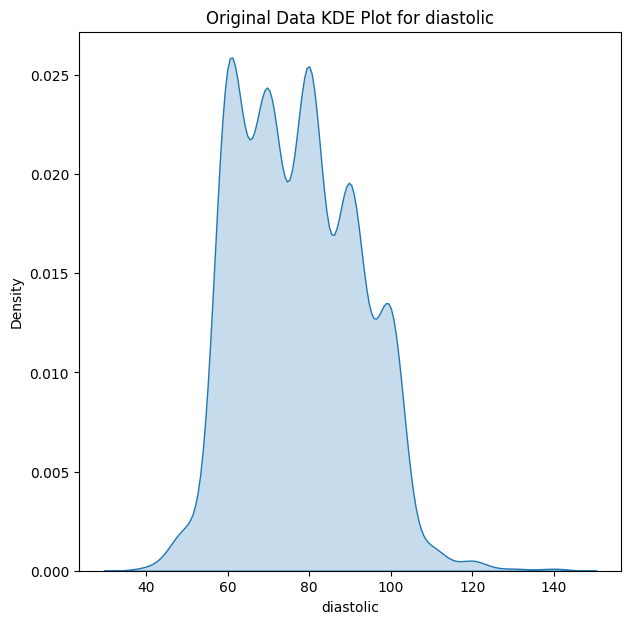

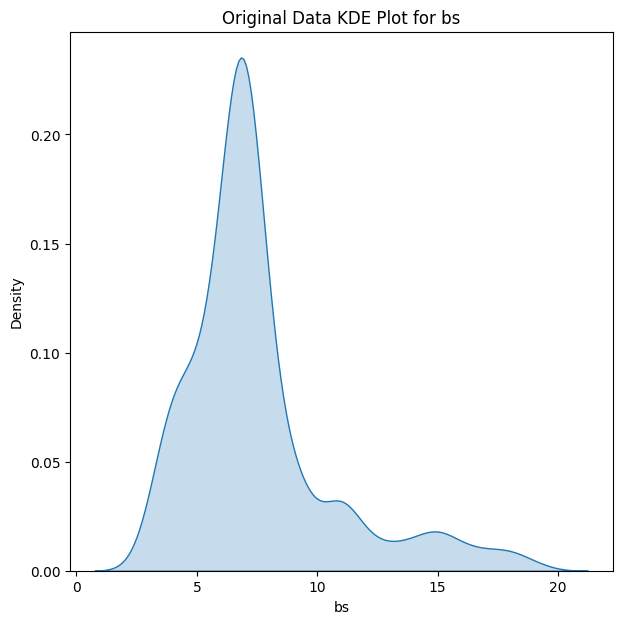

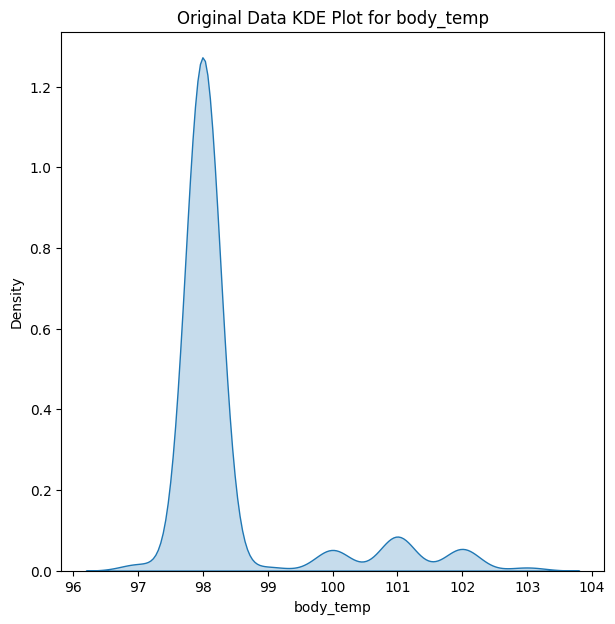

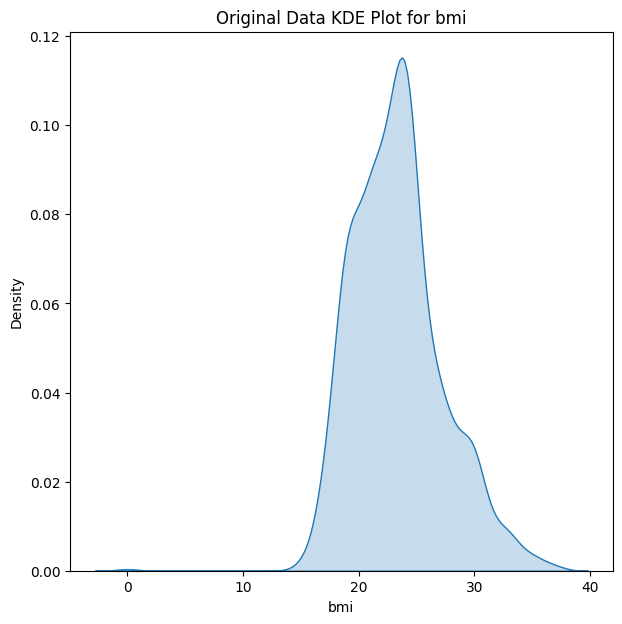

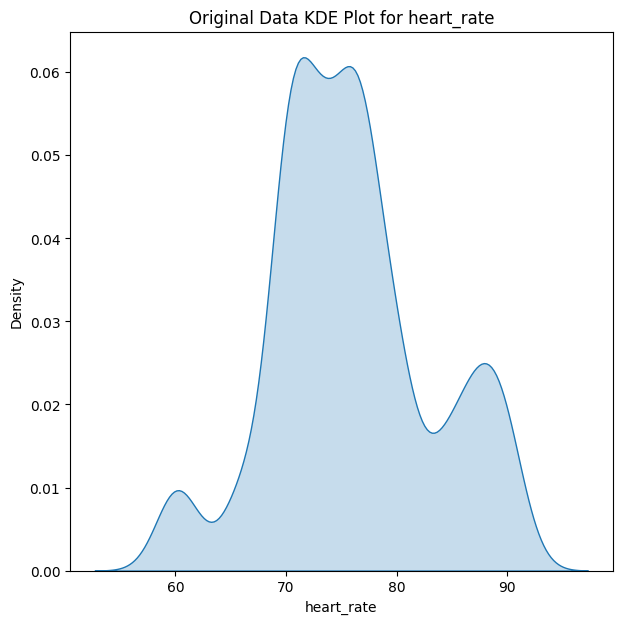

In [46]:
# For each feature in the dataframe
for i in df_cp.columns:
    plt.figure(figsize=(7,7))
    sns.kdeplot(data=df_cp, x=i, fill=True)  # KDE without hue
    plt.title(f'Original Data KDE Plot for {i}')
    plt.show()

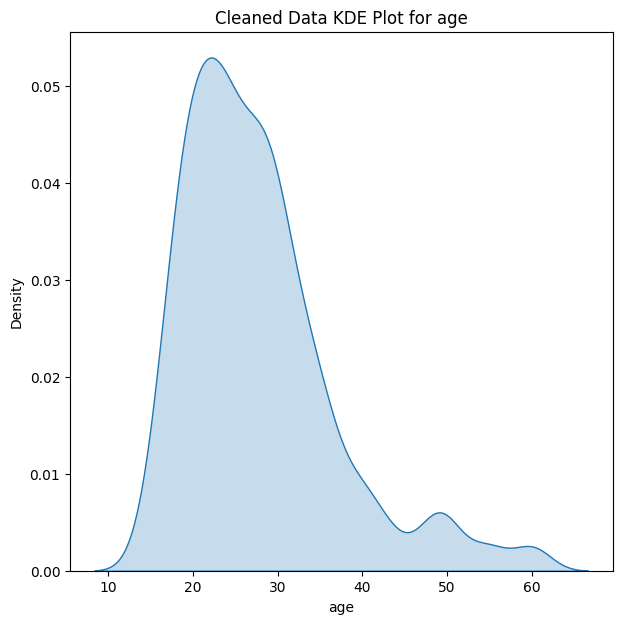

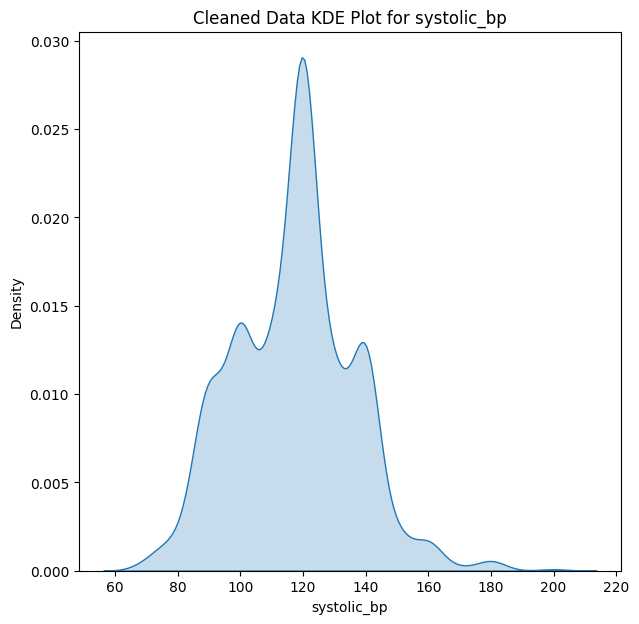

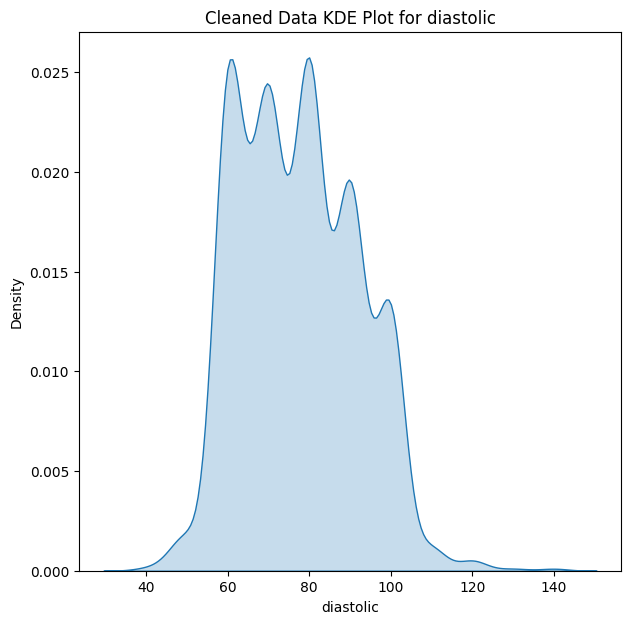

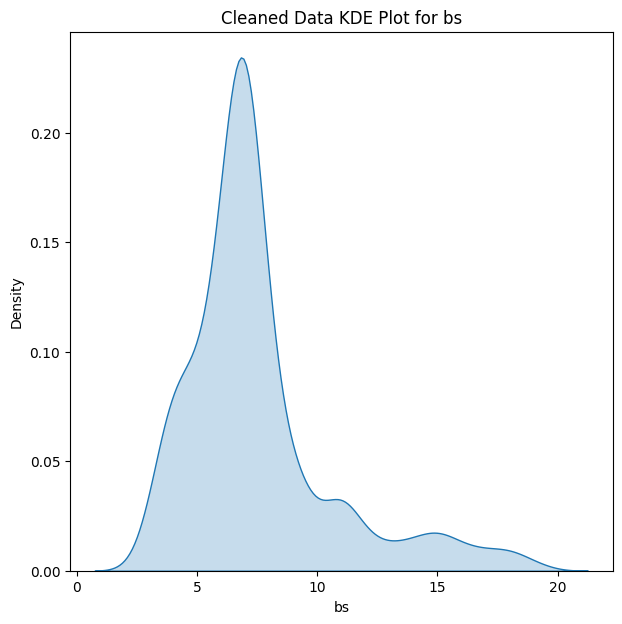

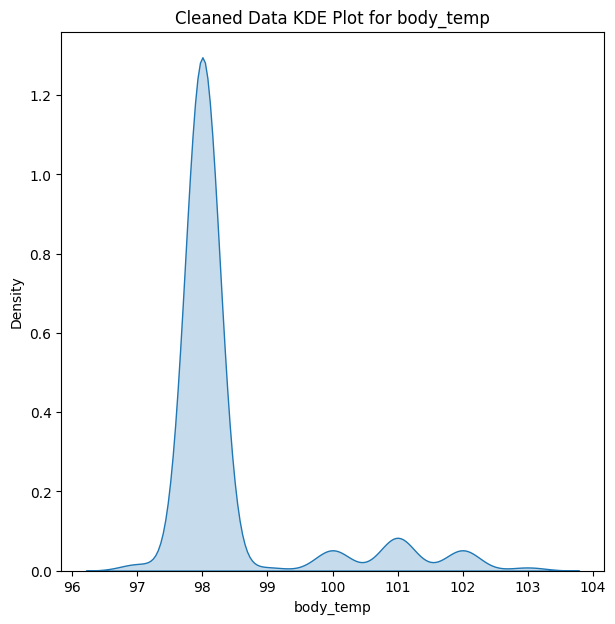

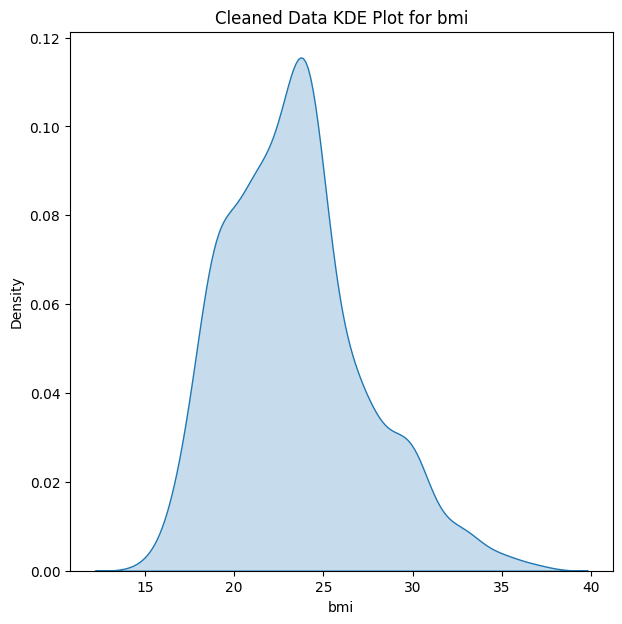

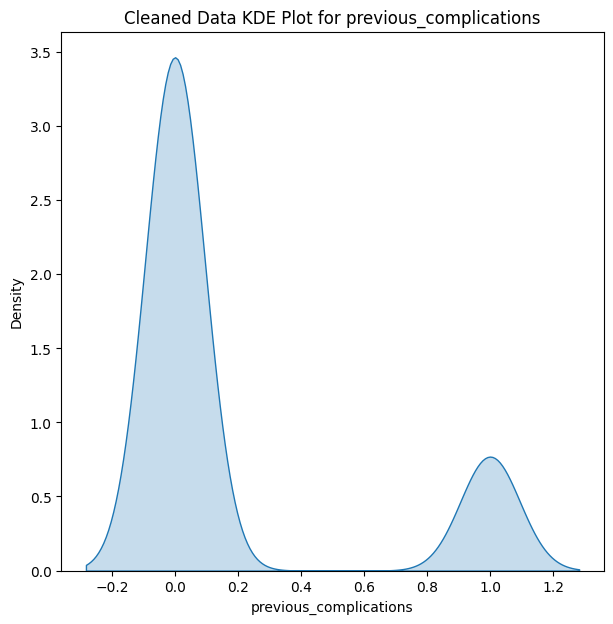

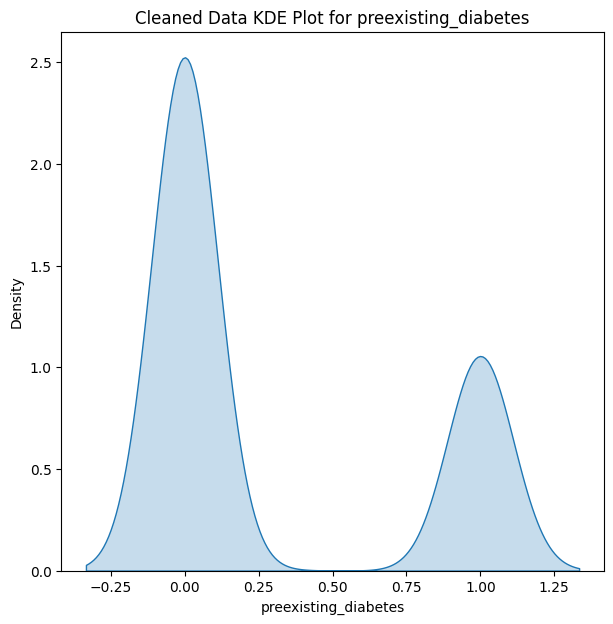

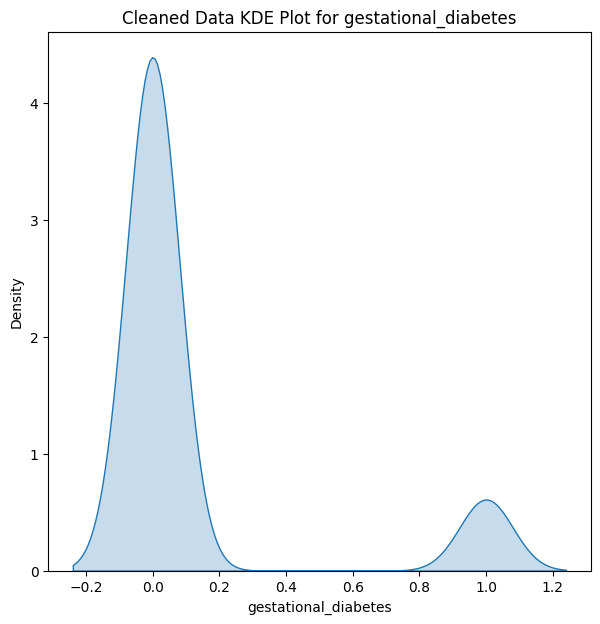

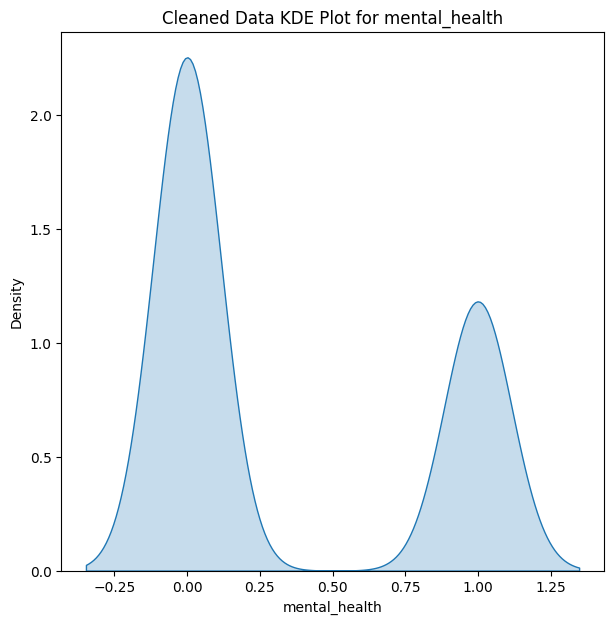

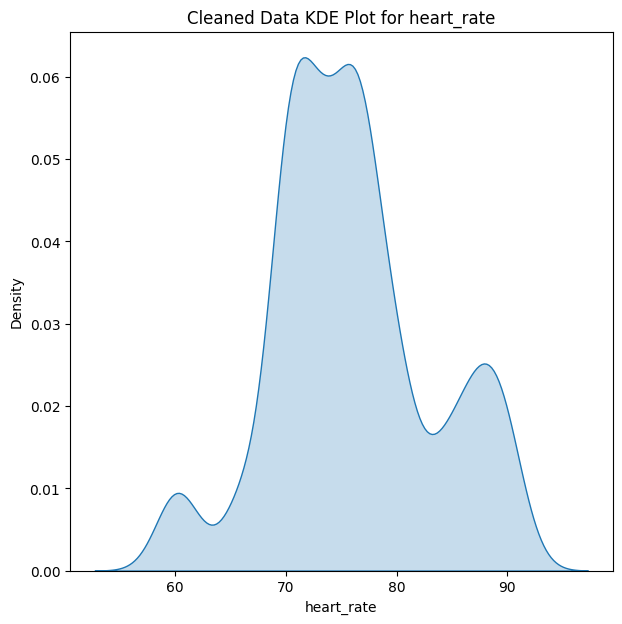

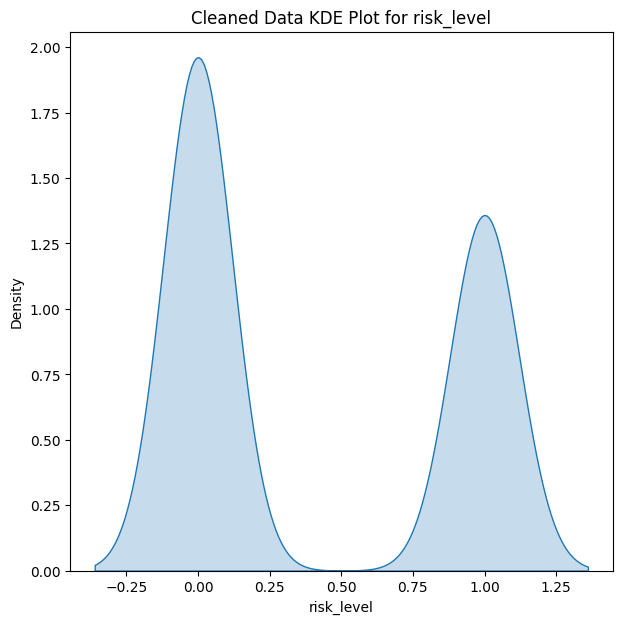

In [47]:
# For each feature in the dataframe
for i in df_cln.columns:
    plt.figure(figsize=(7,7))
    sns.kdeplot(data=df_cln, x=i, fill=True)  # KDE without hue
    plt.title(f'Cleaned Data KDE Plot for {i}')
    plt.show()

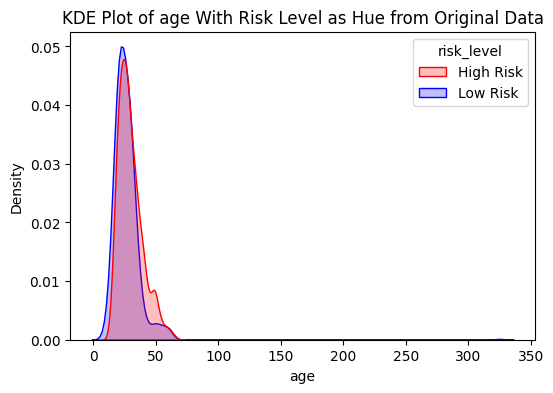

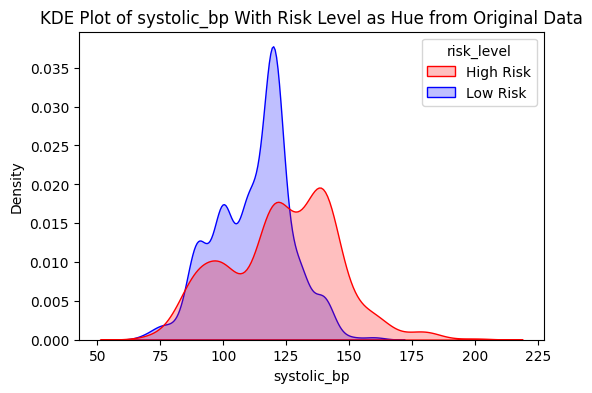

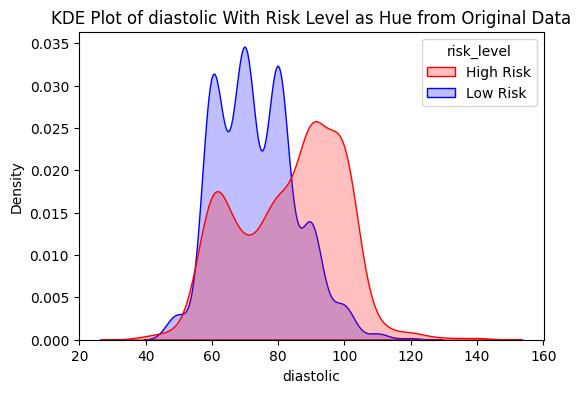

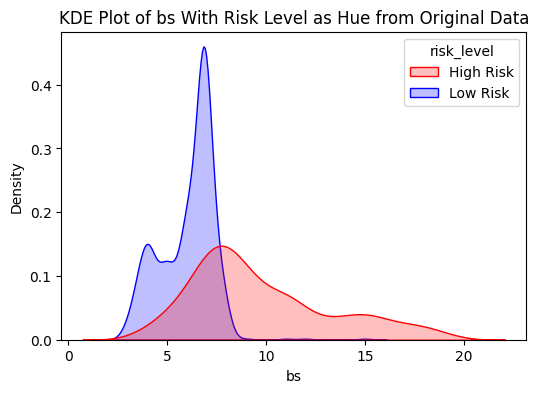

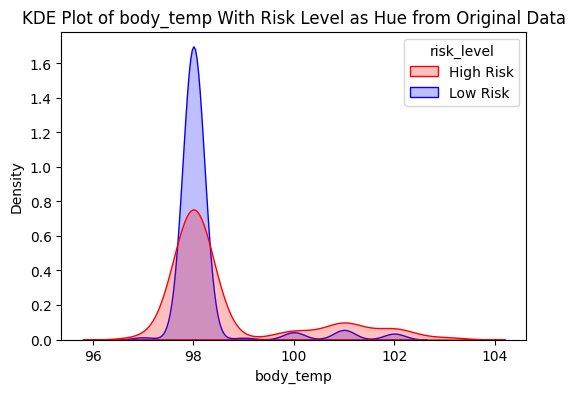

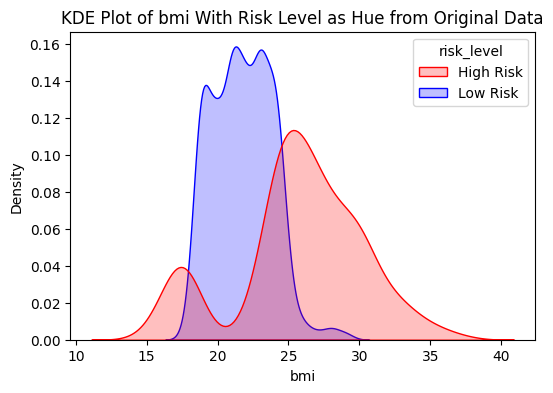

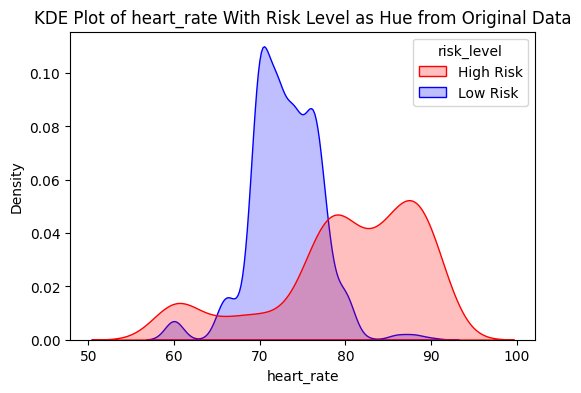

In [48]:
# Define color palette
risk_palette = {0: "blue", 1: "red"}
label_map = {0: "Low Risk", 1: "High Risk"}

num_cols = ['age', 'systolic_bp', 'diastolic', 'bs', 'body_temp', 'bmi', 'heart_rate']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    
    sns.kdeplot(
        data=df,
        x=col,
        hue=df['risk_level'].map(label_map),
        fill=True,
        common_norm=False,
        palette={"Low Risk": "blue", "High Risk": "red"}
    )
    
    plt.title(f'KDE Plot of {col} With Risk Level as Hue from Original Data')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

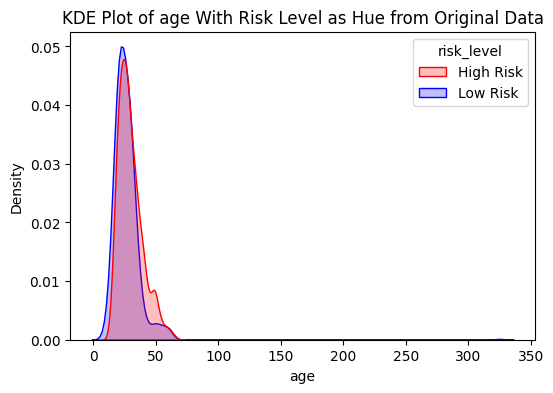

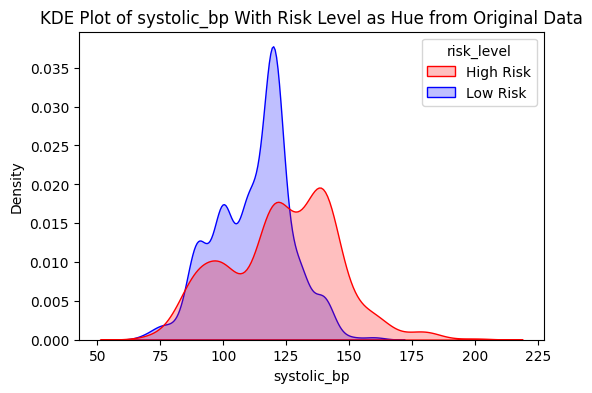

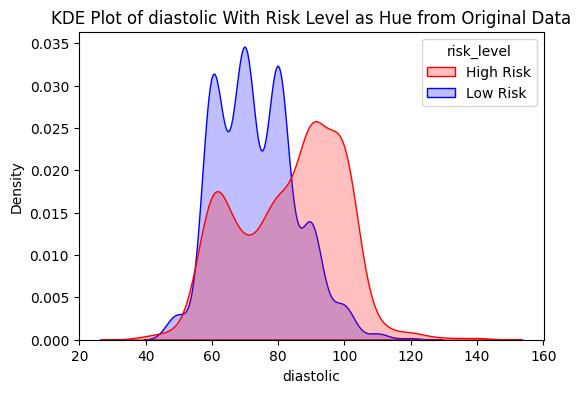

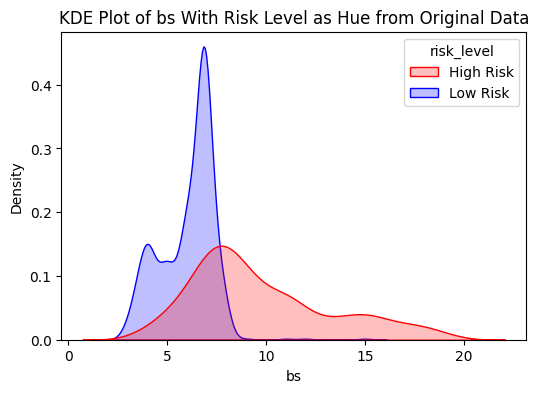

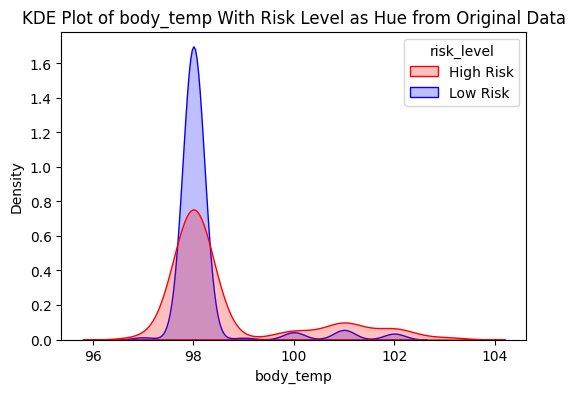

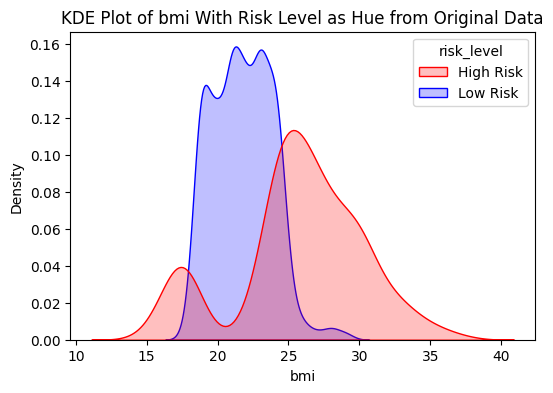

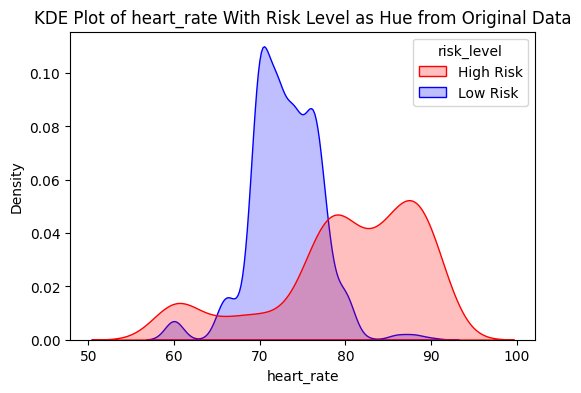

In [49]:
# Define color palette
risk_palette = {0: "blue", 1: "red"}
label_map = {0: "Low Risk", 1: "High Risk"}

num_cols = ['age', 'systolic_bp', 'diastolic', 'bs', 'body_temp', 'bmi', 'heart_rate']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(
        data=df,
        x=col,
        hue=df['risk_level'].map(label_map),
        fill=True,
        common_norm=False,
        palette={"Low Risk": "blue", "High Risk": "red"}
    )
    
    plt.title(f'KDE Plot of {col} With Risk Level as Hue from Original Data')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

# Histogram Plot

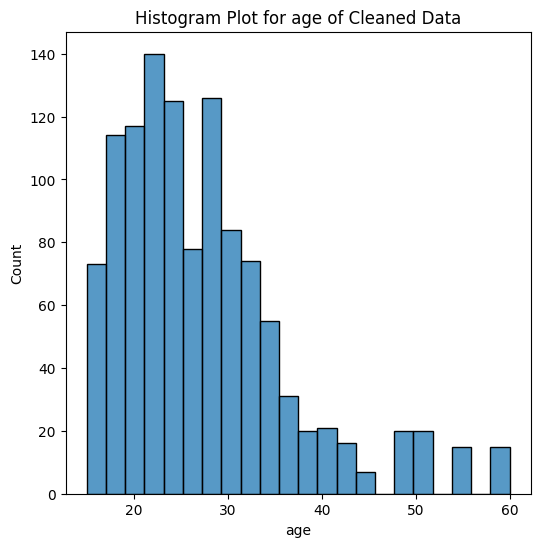

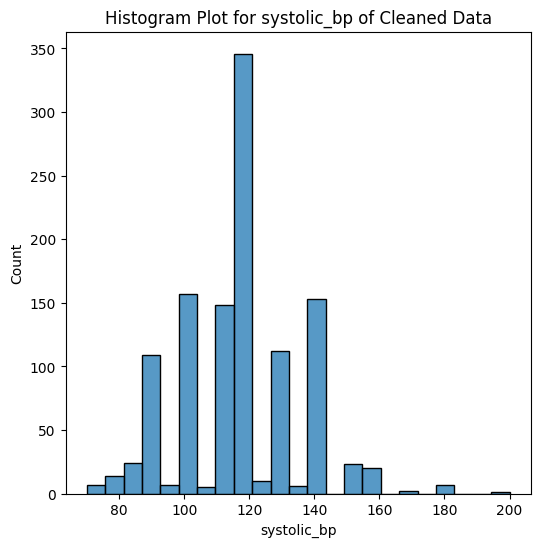

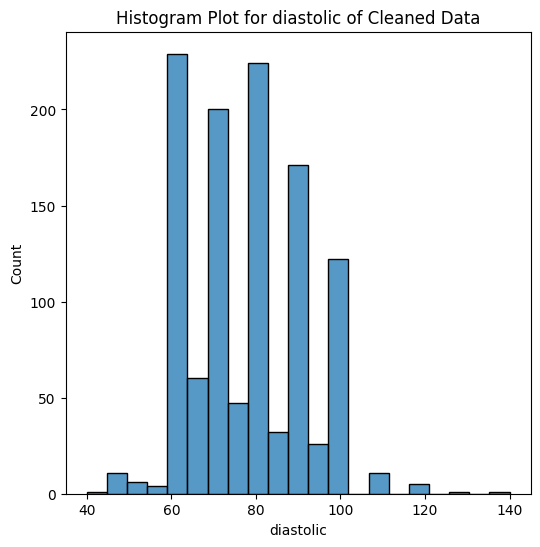

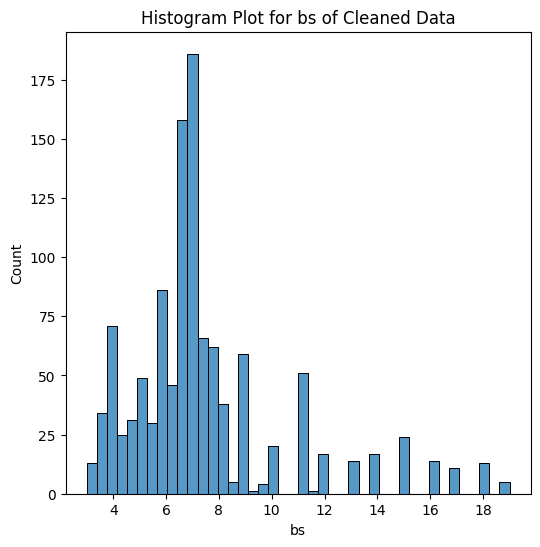

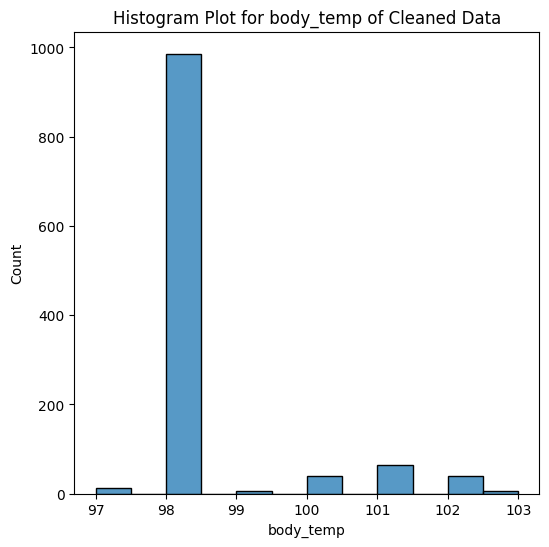

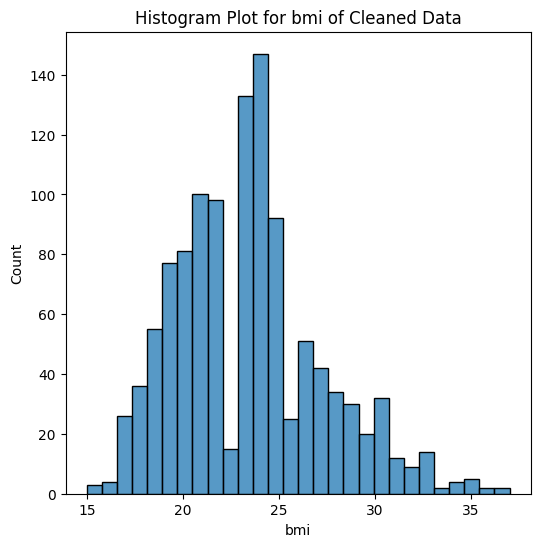

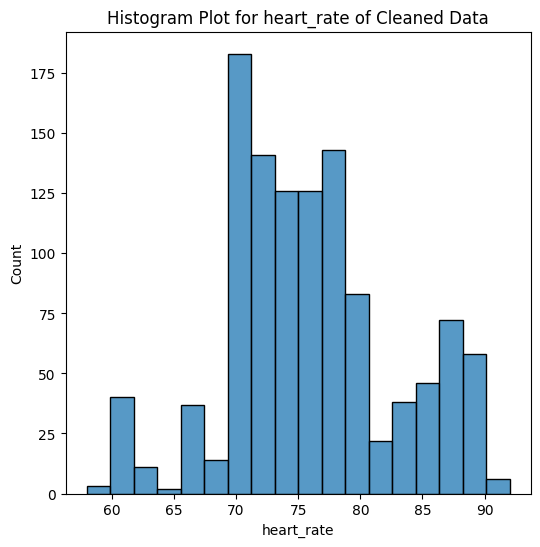

In [50]:
#histogram for features (non-categorical) without hue
# List of columns(non-categorical) to plot
num_cols = ['age', 'systolic_bp', 'diastolic', 'bs', 'body_temp', 'bmi', 'heart_rate']

for i in num_cols:
    plt.figure(figsize=(6,6))
    sns.histplot(data=df_cln, x=i, kde=False)  # Histogram with KDE overlay
    plt.title(f'Histogram Plot for {i} of Cleaned Data')
    plt.show()

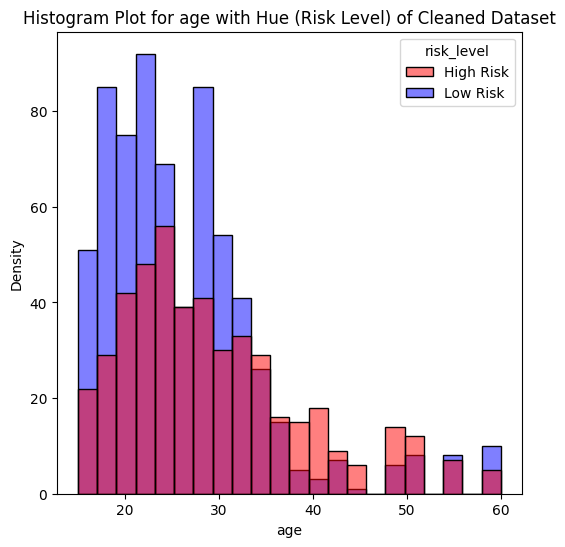

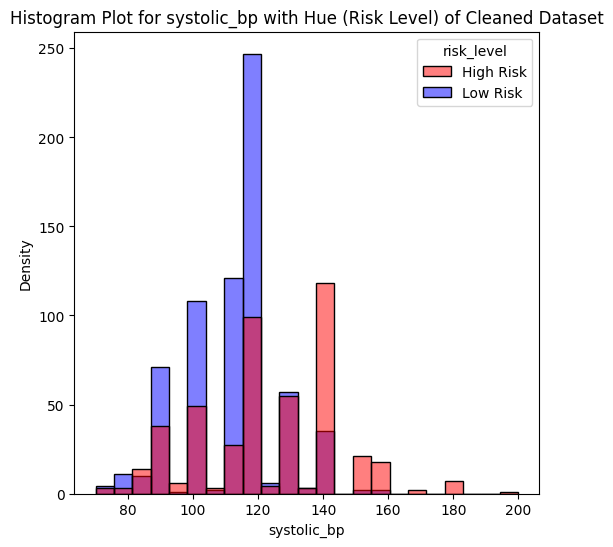

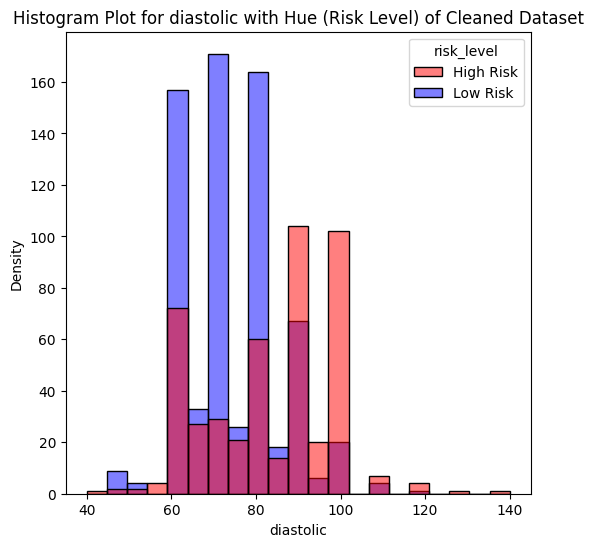

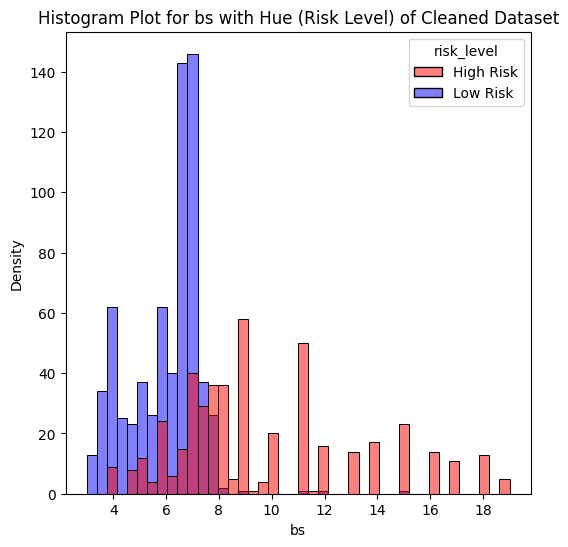

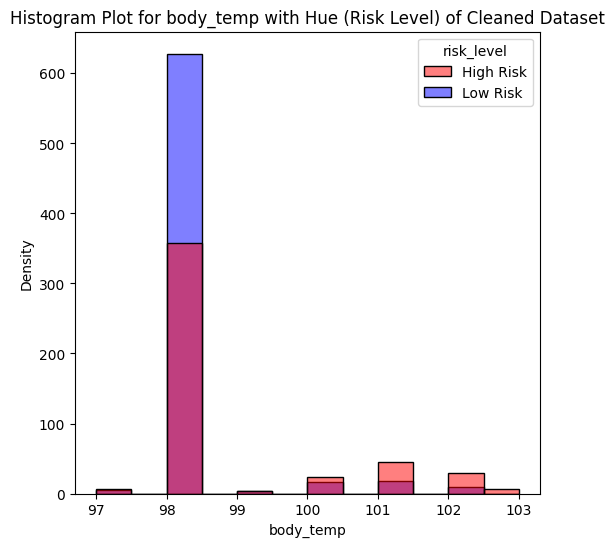

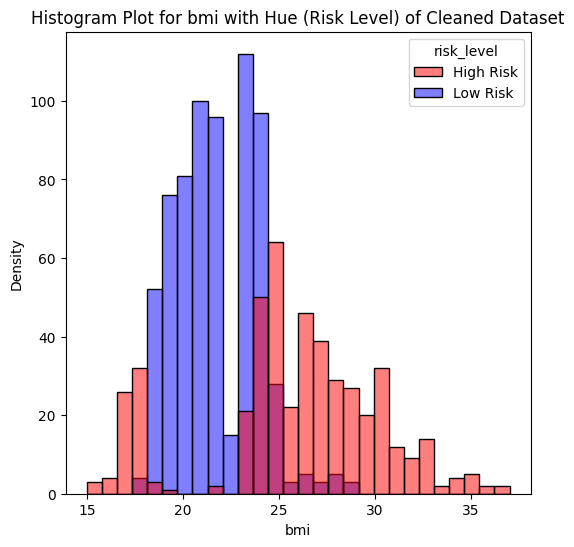

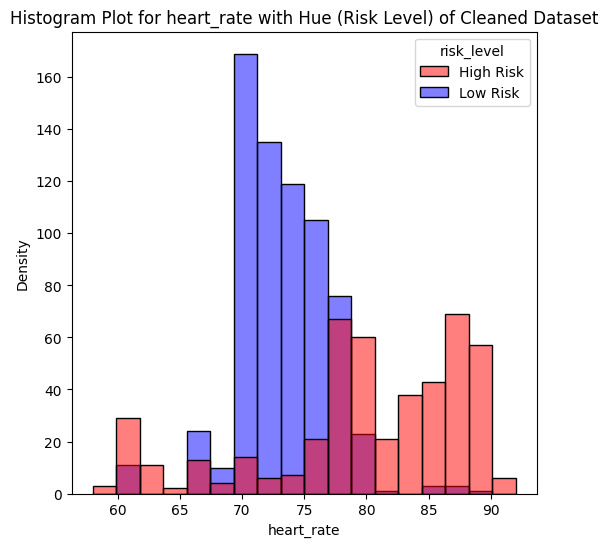

In [51]:
# Keep risk_level as numeric (do NOT map in the DataFrame)
label_map = {0: "Low Risk", 1: "High Risk"}
col_palette = {'Low Risk': 'blue', 'High Risk': 'red'}

# List of numeric columns to plot
num_cols = ['age', 'systolic_bp', 'diastolic', 'bs', 'body_temp', 'bmi', 'heart_rate']

# Plot histograms with mapped labels just for hue
for col in num_cols:
    plt.figure(figsize=(6, 6))
    sns.histplot(
        data=df_cln,
        x=col,
        hue=df_cln['risk_level'].map(label_map),  # map only for hue
        kde=False,
        palette=col_palette
    )
    plt.title(f'Histogram Plot for {col} with Hue (Risk Level) of Cleaned Dataset')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

# Swarm Plot

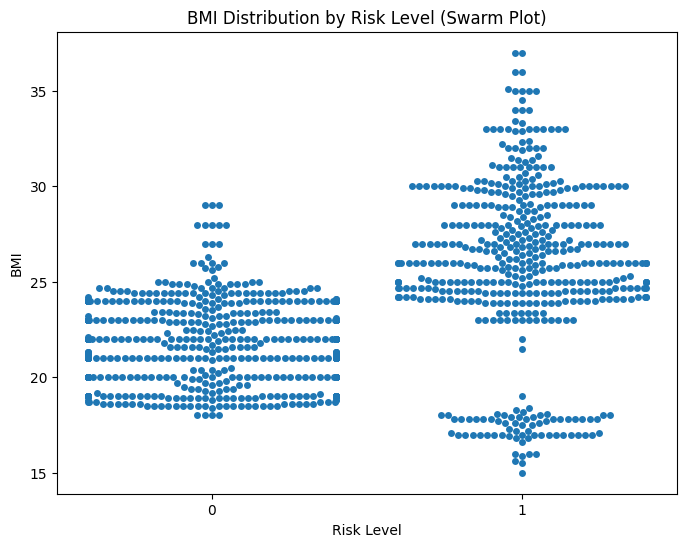

In [52]:
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df_cln, x='risk_level', y='bmi')
plt.title('BMI Distribution by Risk Level (Swarm Plot)')
plt.xlabel('Risk Level')
plt.ylabel('BMI')
plt.show()

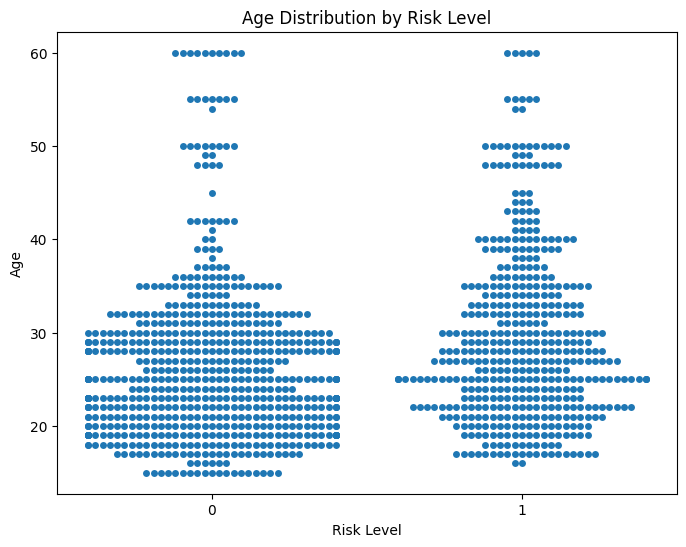

In [53]:
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df_cln, x='risk_level', y='age')
plt.title('Age Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Age')
plt.show()

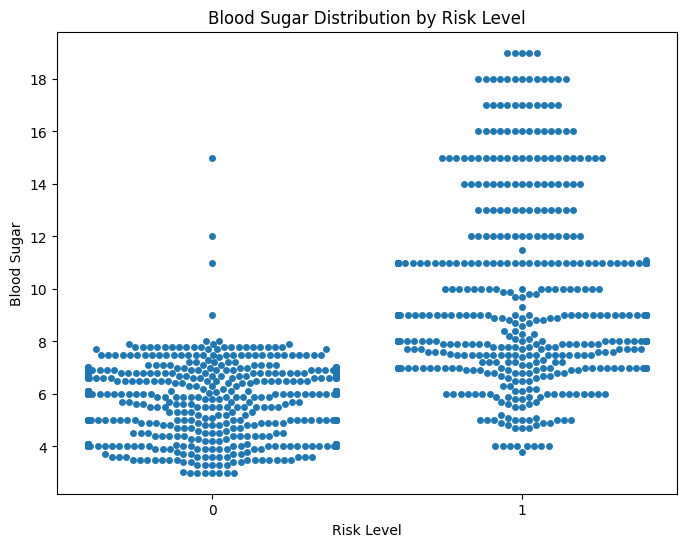

In [54]:
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df_cln, x='risk_level', y='bs')
plt.title('Blood Sugar Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Blood Sugar')
plt.show()

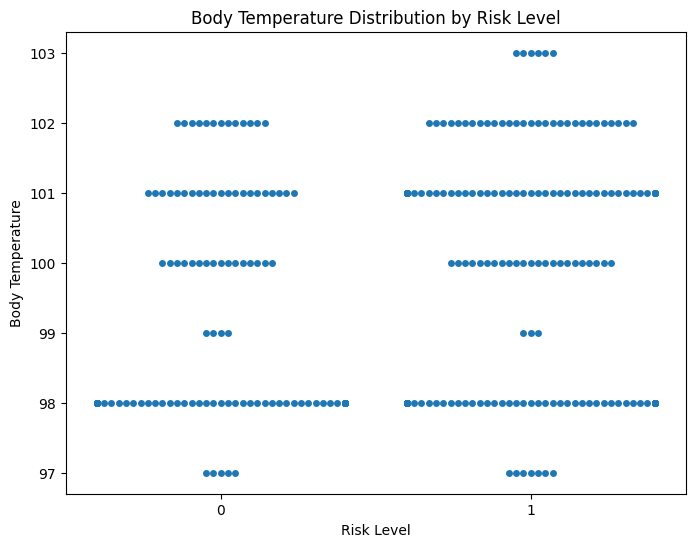

In [55]:
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df, x='risk_level', y='body_temp')
plt.title('Body Temperature Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Body Temperature')
plt.show()

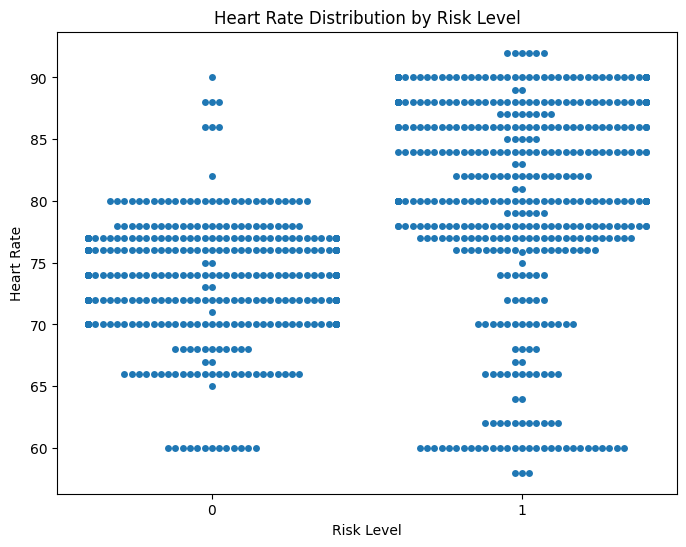

In [56]:
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df, x='risk_level', y='heart_rate')
plt.title('Heart Rate Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Heart Rate')
plt.show()

# Strip Plot

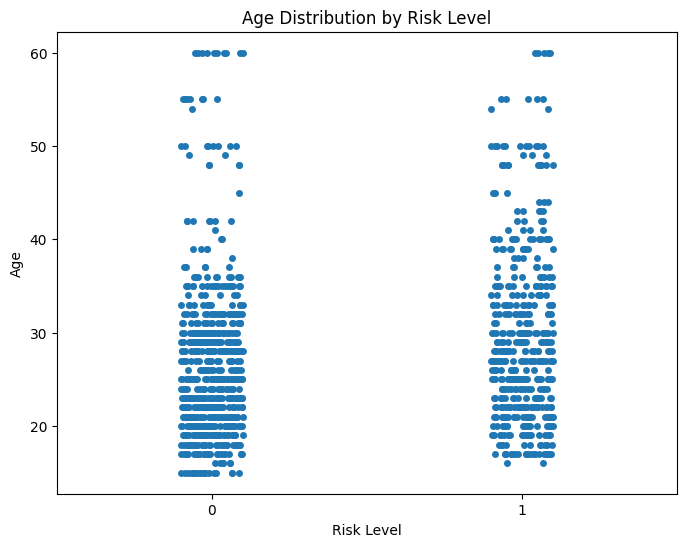

In [57]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_cln, x='risk_level', y='age', jitter=True)
plt.title('Age Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Age')
plt.show()

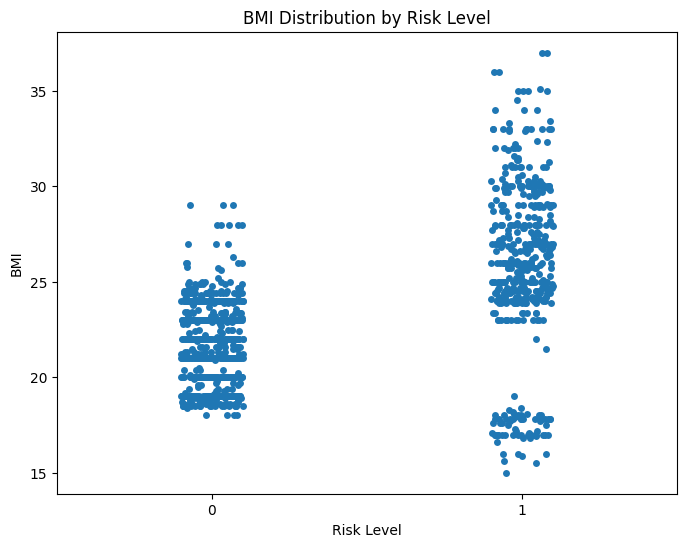

In [58]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_cln, x='risk_level', y='bmi', jitter=True)
plt.title('BMI Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('BMI')
plt.show()

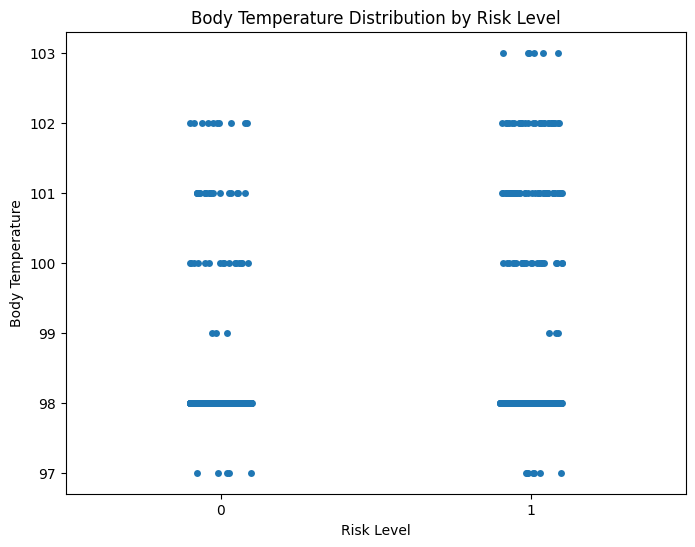

In [59]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_cln, x='risk_level', y='body_temp', jitter=True)
plt.title('Body Temperature Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Body Temperature')
plt.show()

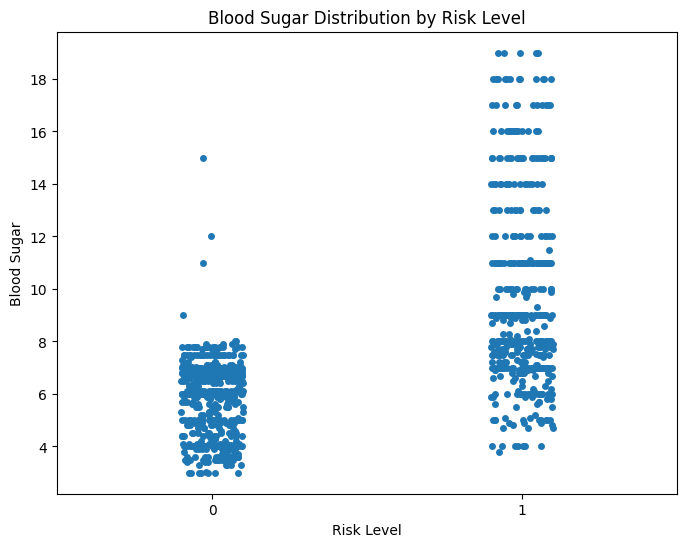

In [60]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_cln, x='risk_level', y='bs', jitter=True)
plt.title('Blood Sugar Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Blood Sugar')
plt.show()

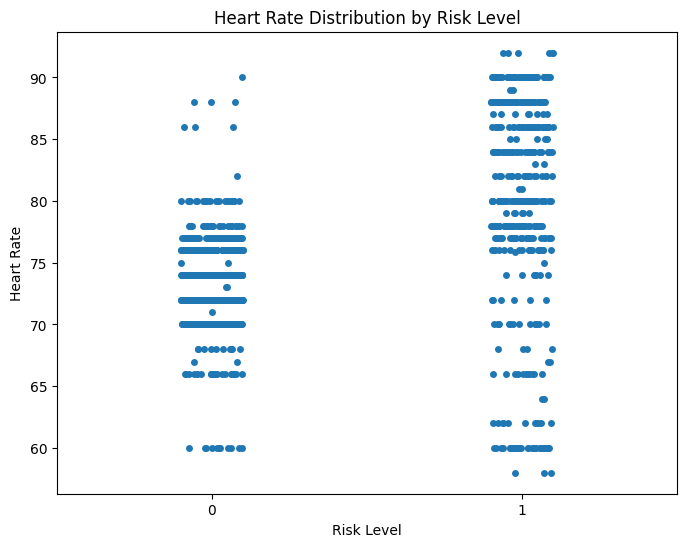

In [61]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_cln, x='risk_level', y='heart_rate', jitter=True)
plt.title('Heart Rate Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Heart Rate')
plt.show()

# Violin Plot

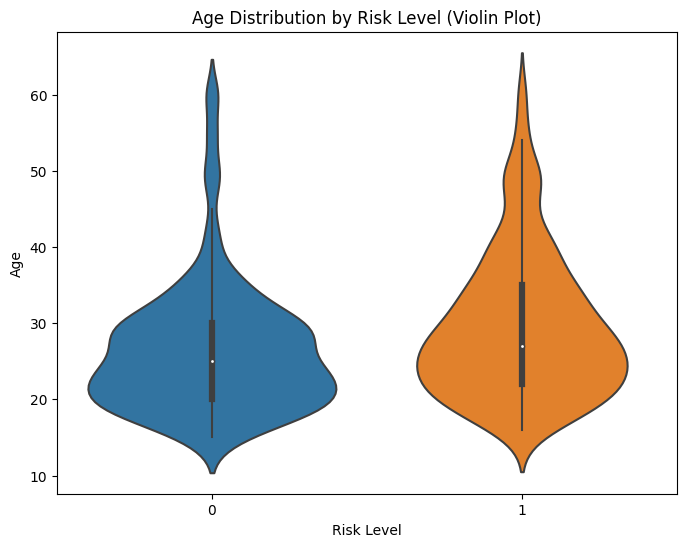

In [62]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_cln, x='risk_level', y='age')
plt.title('Age Distribution by Risk Level (Violin Plot)')
plt.xlabel('Risk Level')
plt.ylabel('Age')
plt.show()

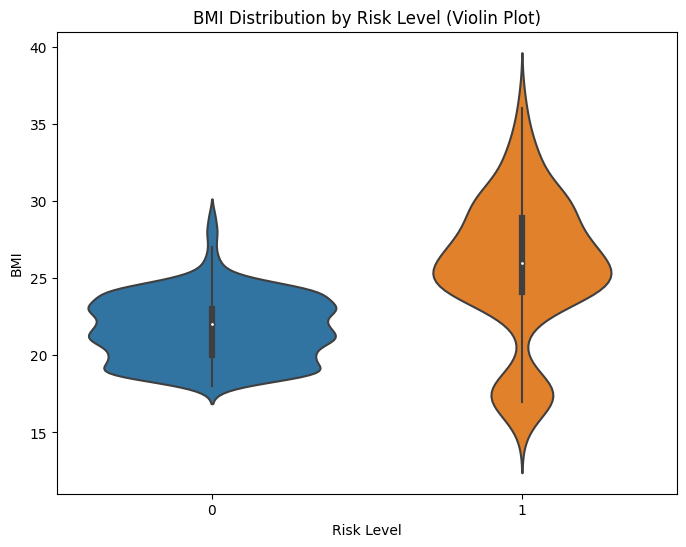

In [63]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_cln, x='risk_level', y='bmi')
plt.title('BMI Distribution by Risk Level (Violin Plot)')
plt.xlabel('Risk Level')
plt.ylabel('BMI')
plt.show()

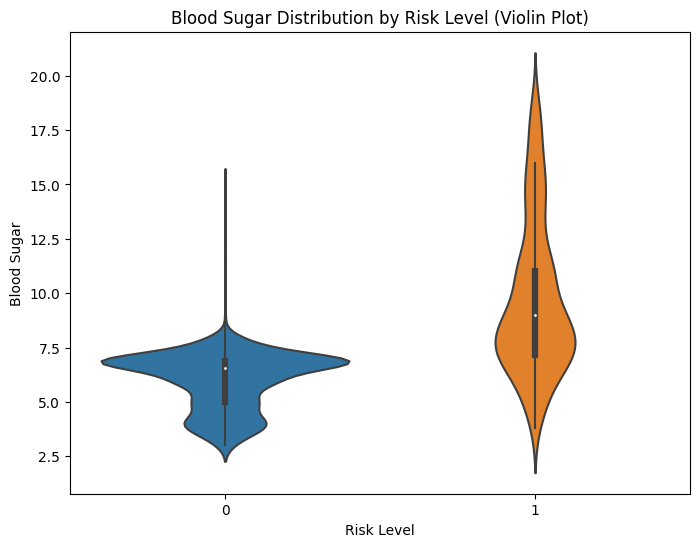

In [64]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_cln, x='risk_level', y='bs')
plt.title('Blood Sugar Distribution by Risk Level (Violin Plot)')
plt.xlabel('Risk Level')
plt.ylabel('Blood Sugar')
plt.show()

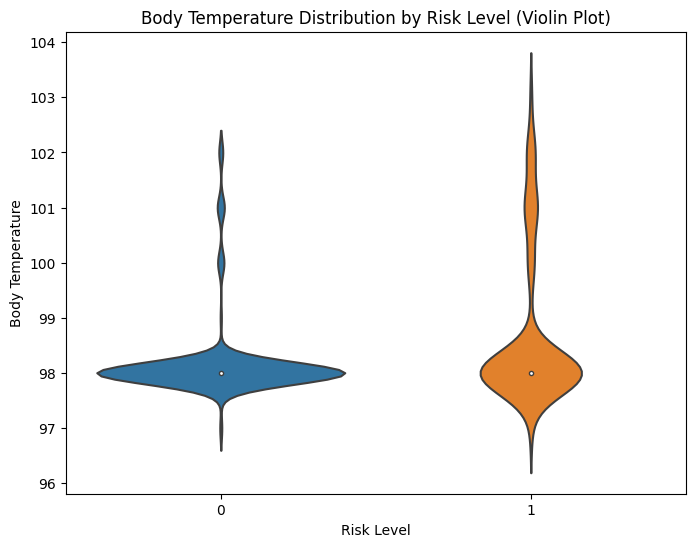

In [65]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_cln, x='risk_level', y='body_temp')
plt.title('Body Temperature Distribution by Risk Level (Violin Plot)')
plt.xlabel('Risk Level')
plt.ylabel('Body Temperature')
plt.show()

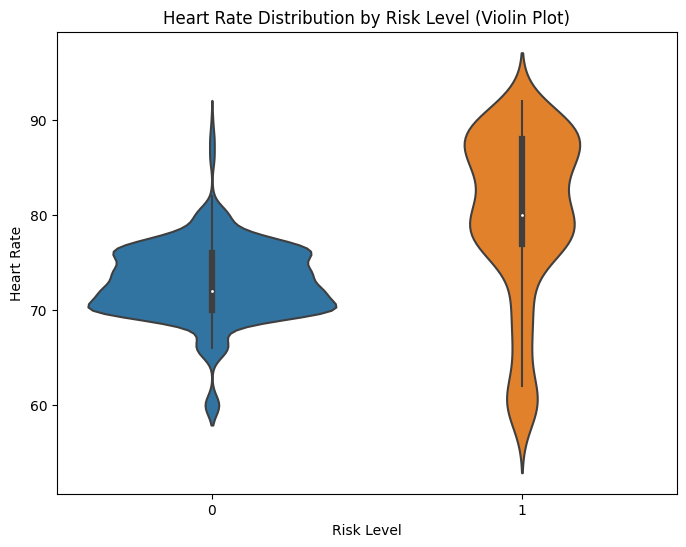

In [66]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_cln, x='risk_level', y='heart_rate')
plt.title('Heart Rate Distribution by Risk Level (Violin Plot)')
plt.xlabel('Risk Level')
plt.ylabel('Heart Rate')
plt.show()

# Feature Scaling - Min Max Scaler

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Split features and target
X = df_cln.drop('risk_level', axis=1)
y = df_cln['risk_level']

# 2. Split into train and test sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and fit MinMaxScaler on training data only
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [68]:
# Transform test data using parameters from training data
X_test_scaled = scaler.transform(X_test)

# Imbalanced Dataset Handling using SMOTE

In [69]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the scaled training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution before and after SMOTE
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Before SMOTE:
risk_level
0    542
1    378
Name: count, dtype: int64

After SMOTE:
risk_level
1    542
0    542
Name: count, dtype: int64
